In [364]:
features_response=['LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 
        'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month']

In [365]:
corr = df[features_response].corr()
corr.iloc[0:5,0:5]

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1
LIMIT_BAL,1.000000,-0.261275,-0.145821,0.189536,-0.271001
EDUCATION,-0.261275,1.000000,-0.039692,0.043052,0.108016
MARRIAGE,-0.145821,-0.039692,1.000000,-0.475248,0.019419
AGE,0.189536,0.043052,-0.475248,1.000000,-0.041539
PAY_1,-0.271001,0.108016,0.019419,-0.041539,1.000000


<AxesSubplot:>

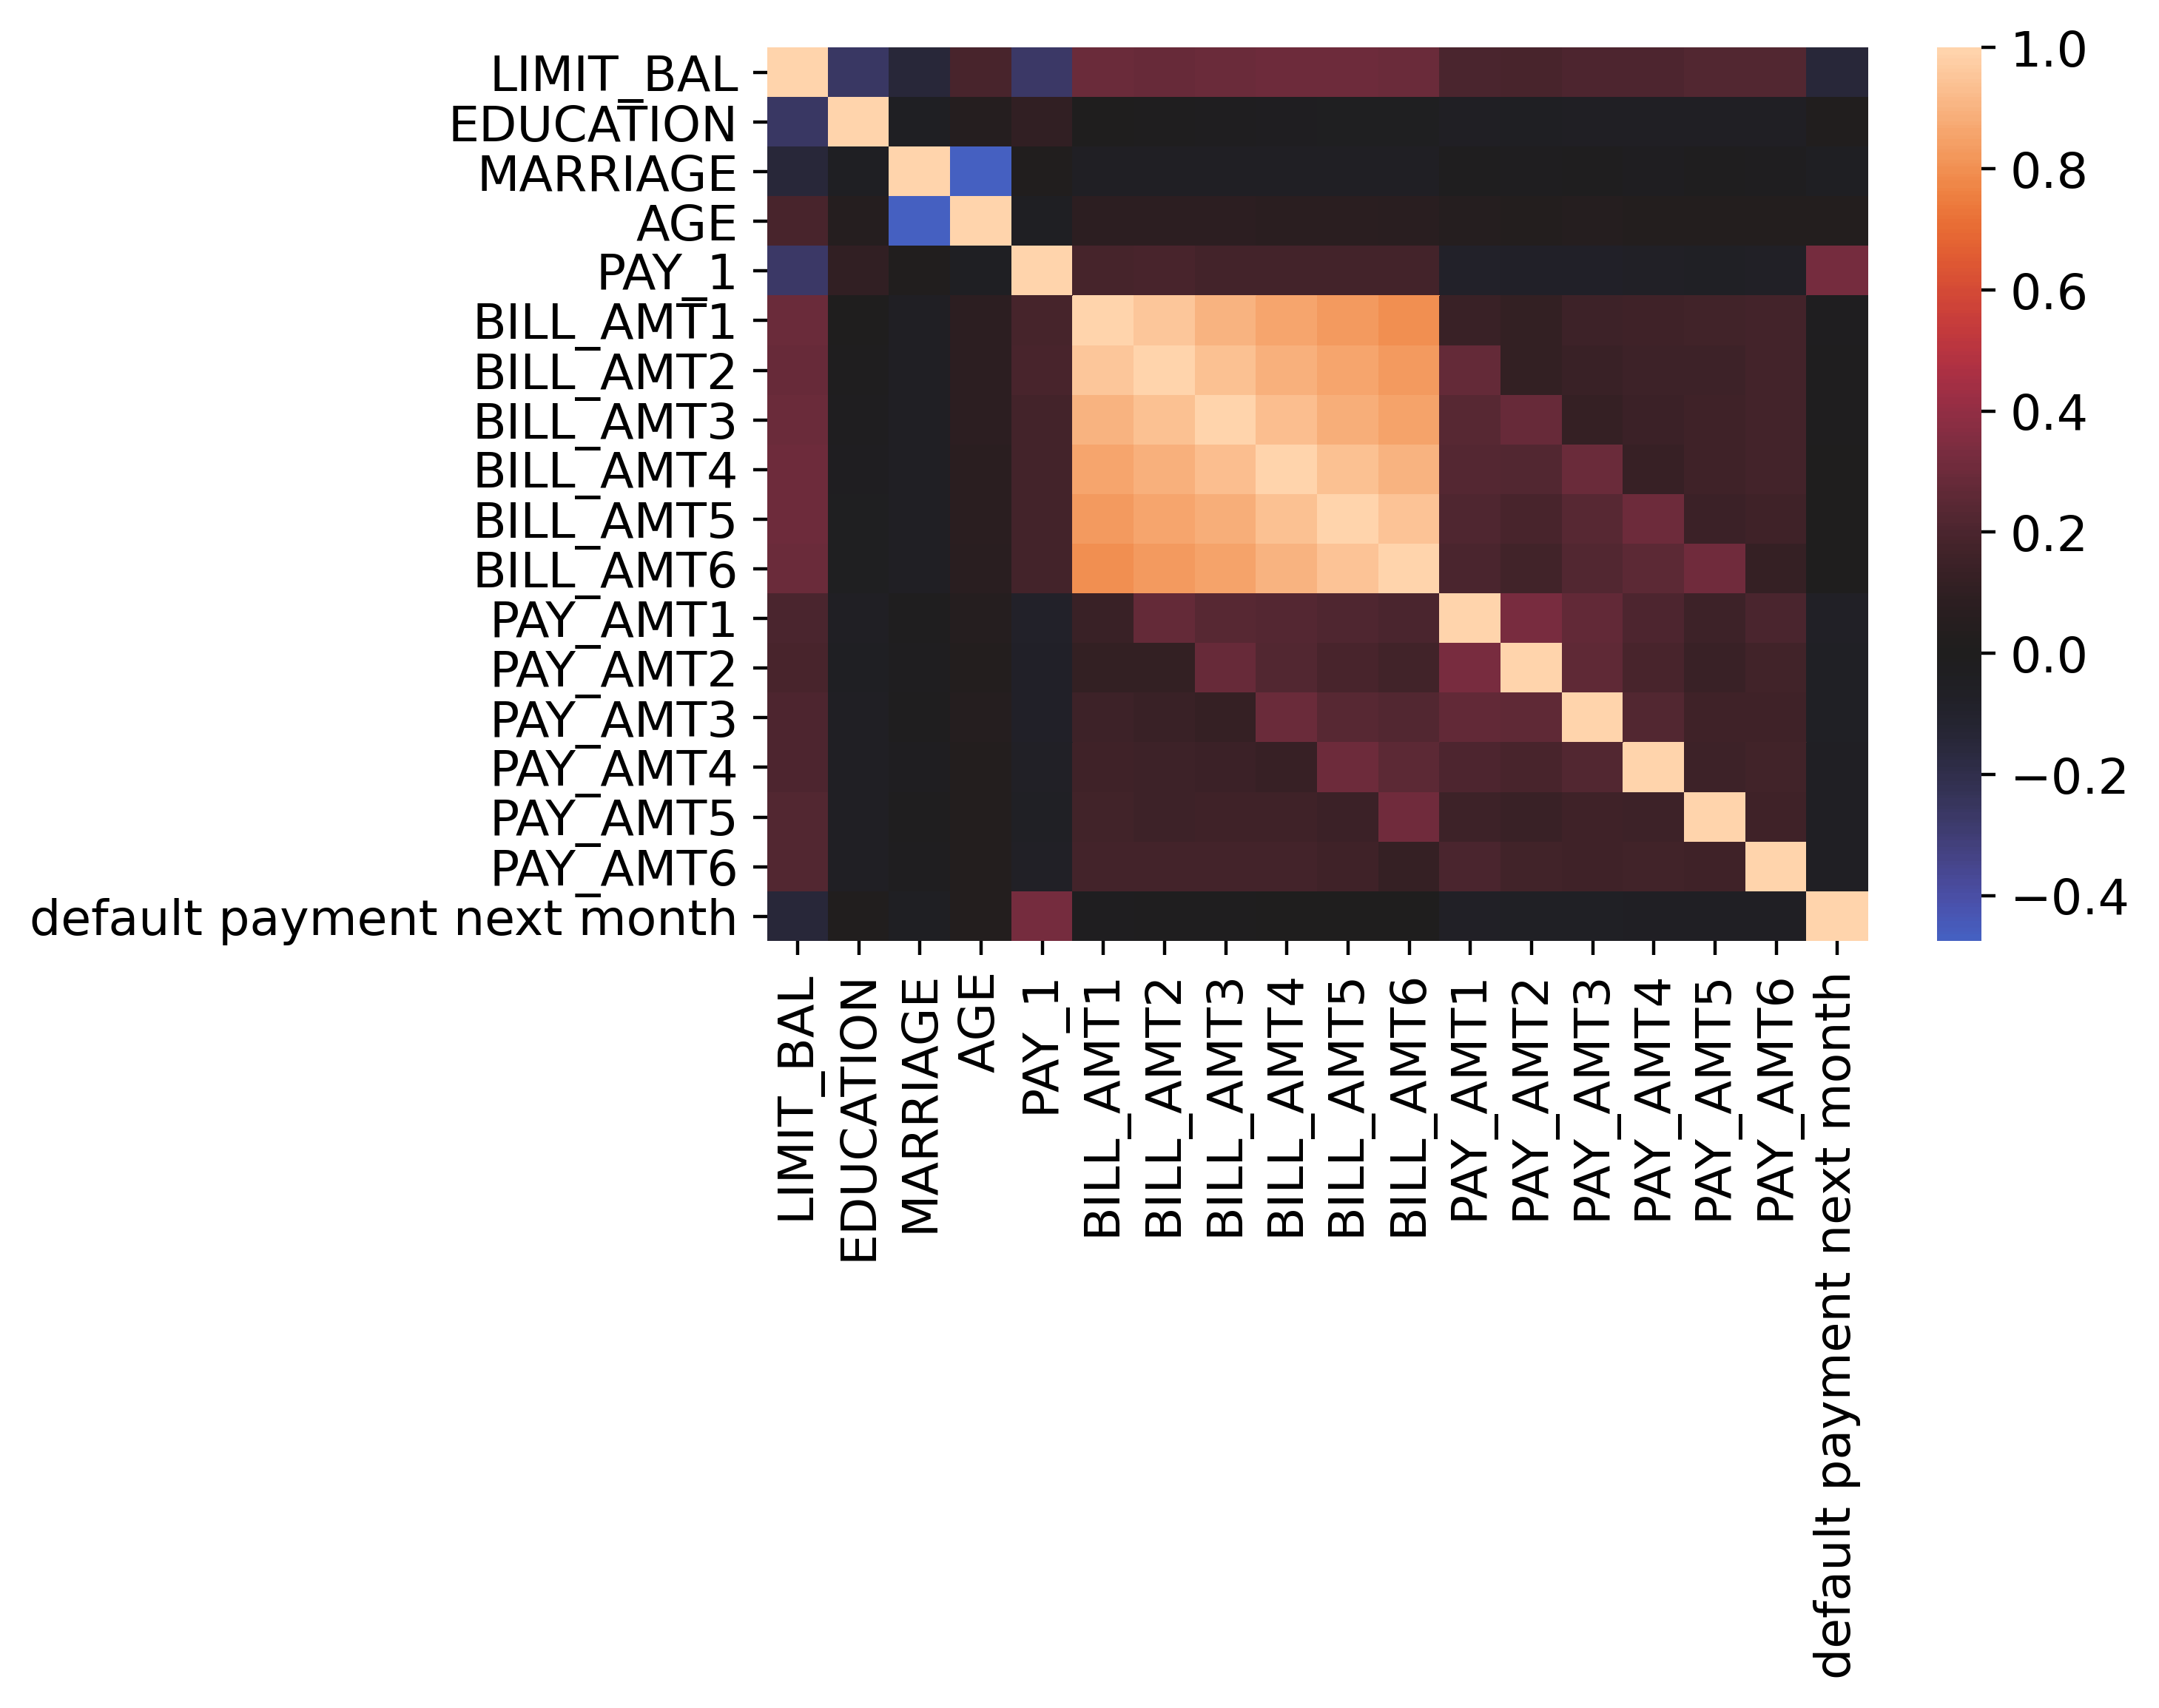

In [366]:
import seaborn as sns
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            center=0)

In [367]:
X = df[features_response].iloc[:,:-1].values
y = df[features_response].iloc[:,-1].values
print(X.shape, y.shape)

(26979, 17) (26979,)


In [368]:
from sklearn.feature_selection import f_classif
[f_stat, f_p_value] = f_classif(X, y)

In [369]:
f_test_df = pd.DataFrame({'Feature':features_response[:-1],
                          'F statistic':f_stat,
                          'p value':f_p_value})
f_test_df.sort_values('p value')

,Feature,F statistic,p value
4,PAY_1,3179.963673,0.000000e+00
0,LIMIT_BAL,577.024853,3.524270e-126
11,PAY_AMT1,133.362250,8.900087e-31
12,PAY_AMT2,96.496479,9.761335e-23
13,PAY_AMT3,84.827638,3.484856e-20
15,PAY_AMT5,80.534845,3.037311e-19
16,PAY_AMT6,75.602680,3.662330e-18
14,PAY_AMT4,74.694540,5.793768e-18
2,MARRIAGE,46.329323,1.020494e-11
3,AGE,33.702635,6.493260e-09


In [370]:
from sklearn.feature_selection import SelectPercentile
selector = SelectPercentile(f_classif, percentile=20)
selector.fit(X, y)

SelectPercentile(percentile=20)

In [371]:
best_feature_ix = selector.get_support()
best_feature_ix

array([ True, False, False, False,  True, False, False, False, False,
       False, False,  True,  True, False, False, False, False])

In [372]:
features = features_response[:-1]

In [373]:
best_features = [features[counter] for counter in range(len(features))
                 if best_feature_ix[counter]]
best_features

['LIMIT_BAL', 'PAY_1', 'PAY_AMT1', 'PAY_AMT2']

In [374]:
overall_default_rate = df['default payment next month'].mean()
overall_default_rate

0.21920753178398014

In [375]:
group_by_pay_mean_y = df.groupby('PAY_1').agg({'default payment next month':np.mean})
group_by_pay_mean_y

,default payment next month
PAY_1,
-2,0.131664
-1,0.170002
0,0.125280
1,0.336400
2,0.694701
3,0.773973
4,0.682540
5,0.434783
6,0.545455


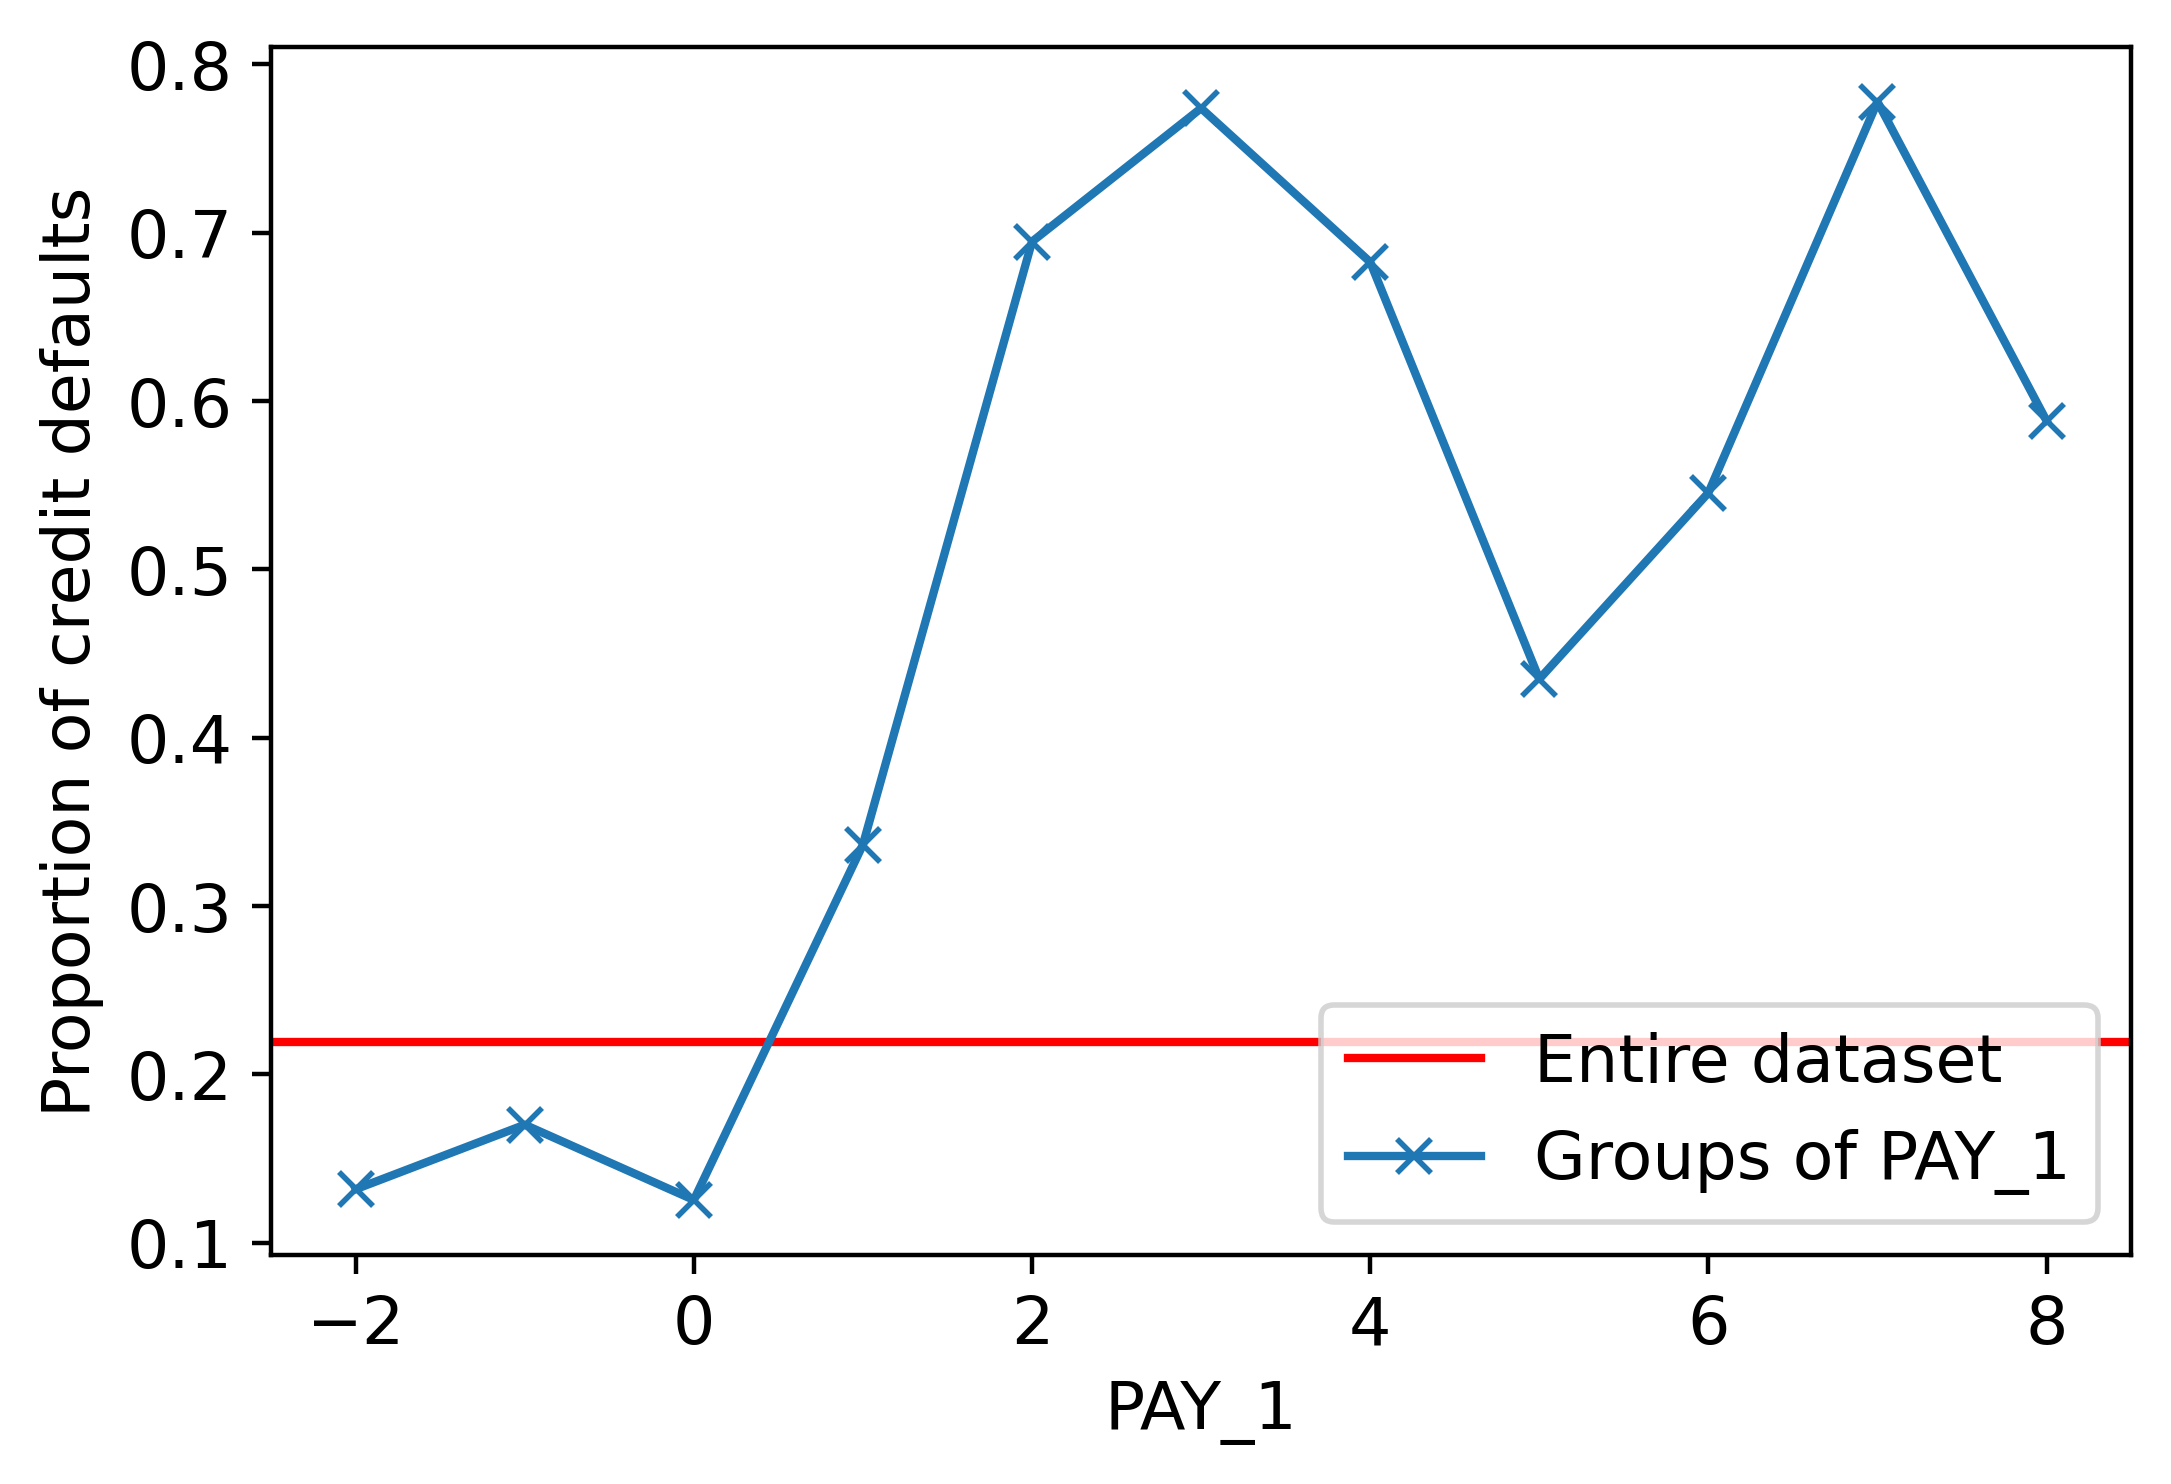

In [376]:
axes = plt.axes()
axes.axhline(overall_default_rate, color='red')
group_by_pay_mean_y.plot(marker='x', legend=False, ax=axes)
axes.set_ylabel('Proportion of credit defaults')
axes.legend(['Entire dataset', 'Groups of PAY_1'])

In [377]:
pos_mask = y == 1
neg_mask = y == 0

Text(0.5, 1.0, 'Credit limits by response variable')

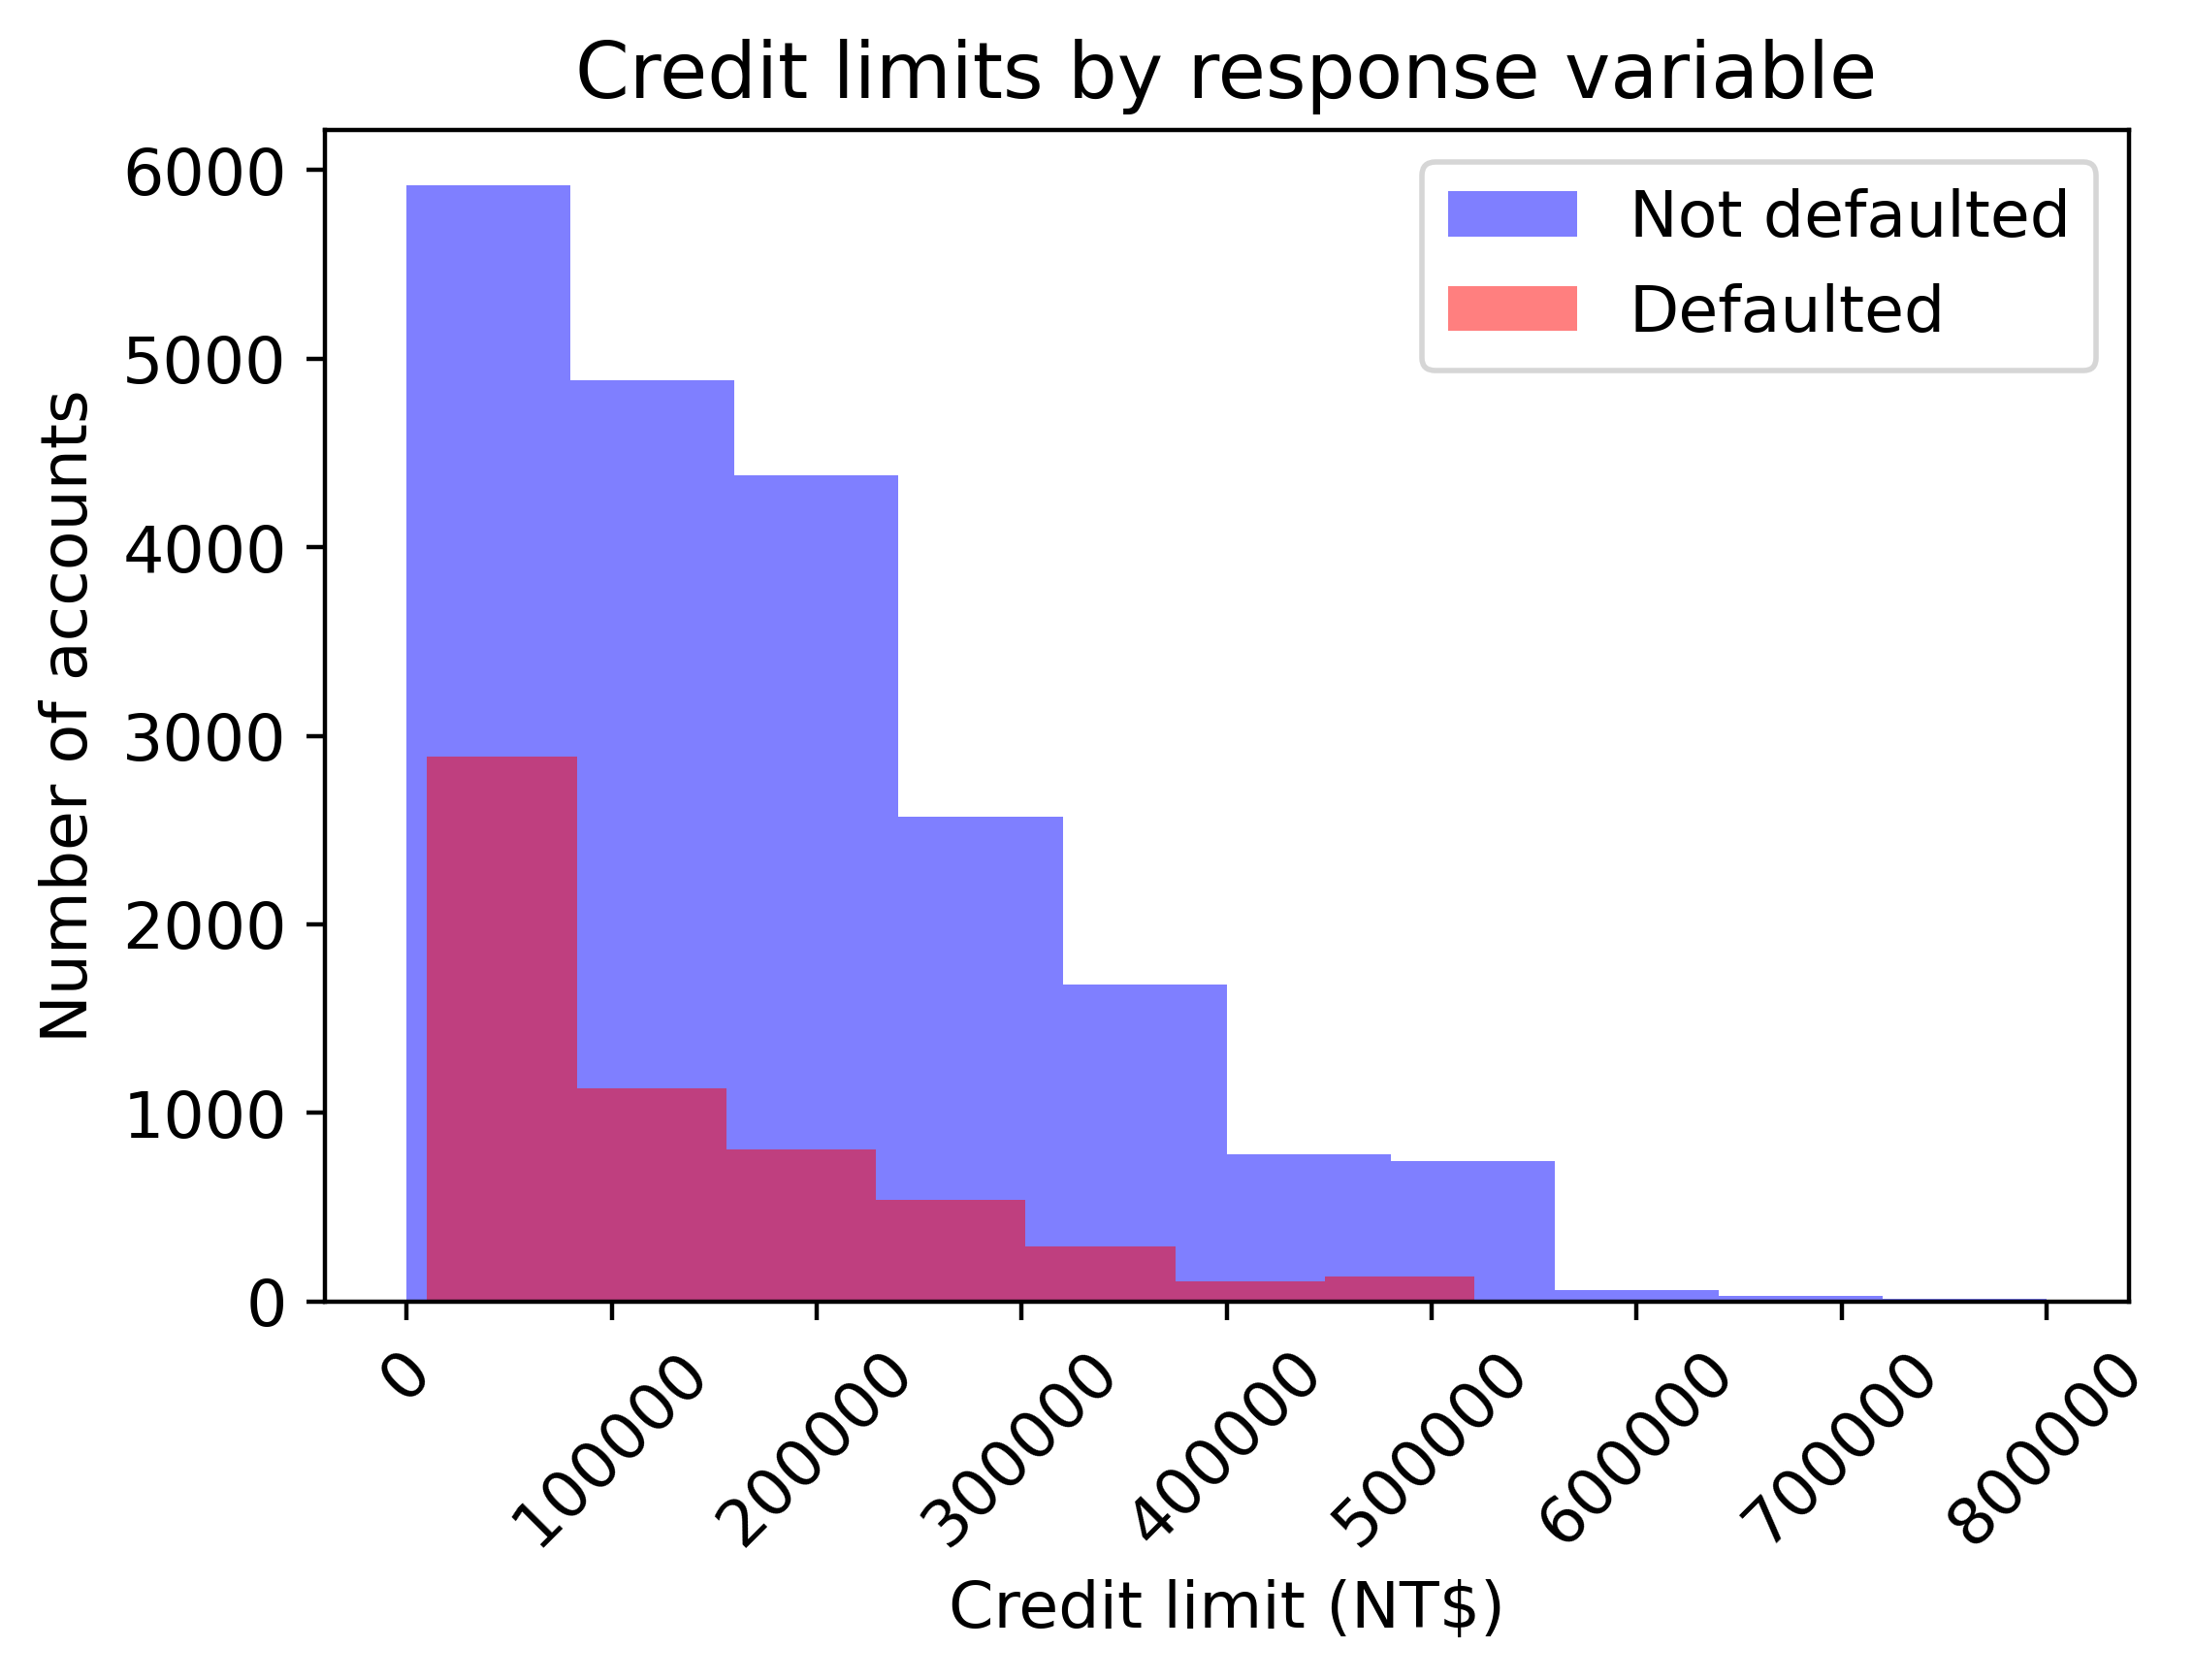

In [378]:
axes = plt.axes()
axes.hist(df.loc[neg_mask, 'LIMIT_BAL'], alpha=0.5, color='blue')
axes.hist(df.loc[pos_mask, 'LIMIT_BAL'], alpha=0.5, color='red')
axes.tick_params(axis='x', labelrotation=45)
axes.set_xlabel('Credit limit (NT$)')
axes.set_ylabel('Number of accounts')
axes.legend(['Not defaulted', 'Defaulted'])
axes.set_title('Credit limits by response variable')

In [379]:
bin_edges = list(range(0,850000,50000))
print(bin_edges[-1])

800000


<ipython-input-380-83eb218adef1>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(np.round(y_ticks*50000,2))


Text(0.5, 1.0, 'Normalized distributions of credit limits by response variable')

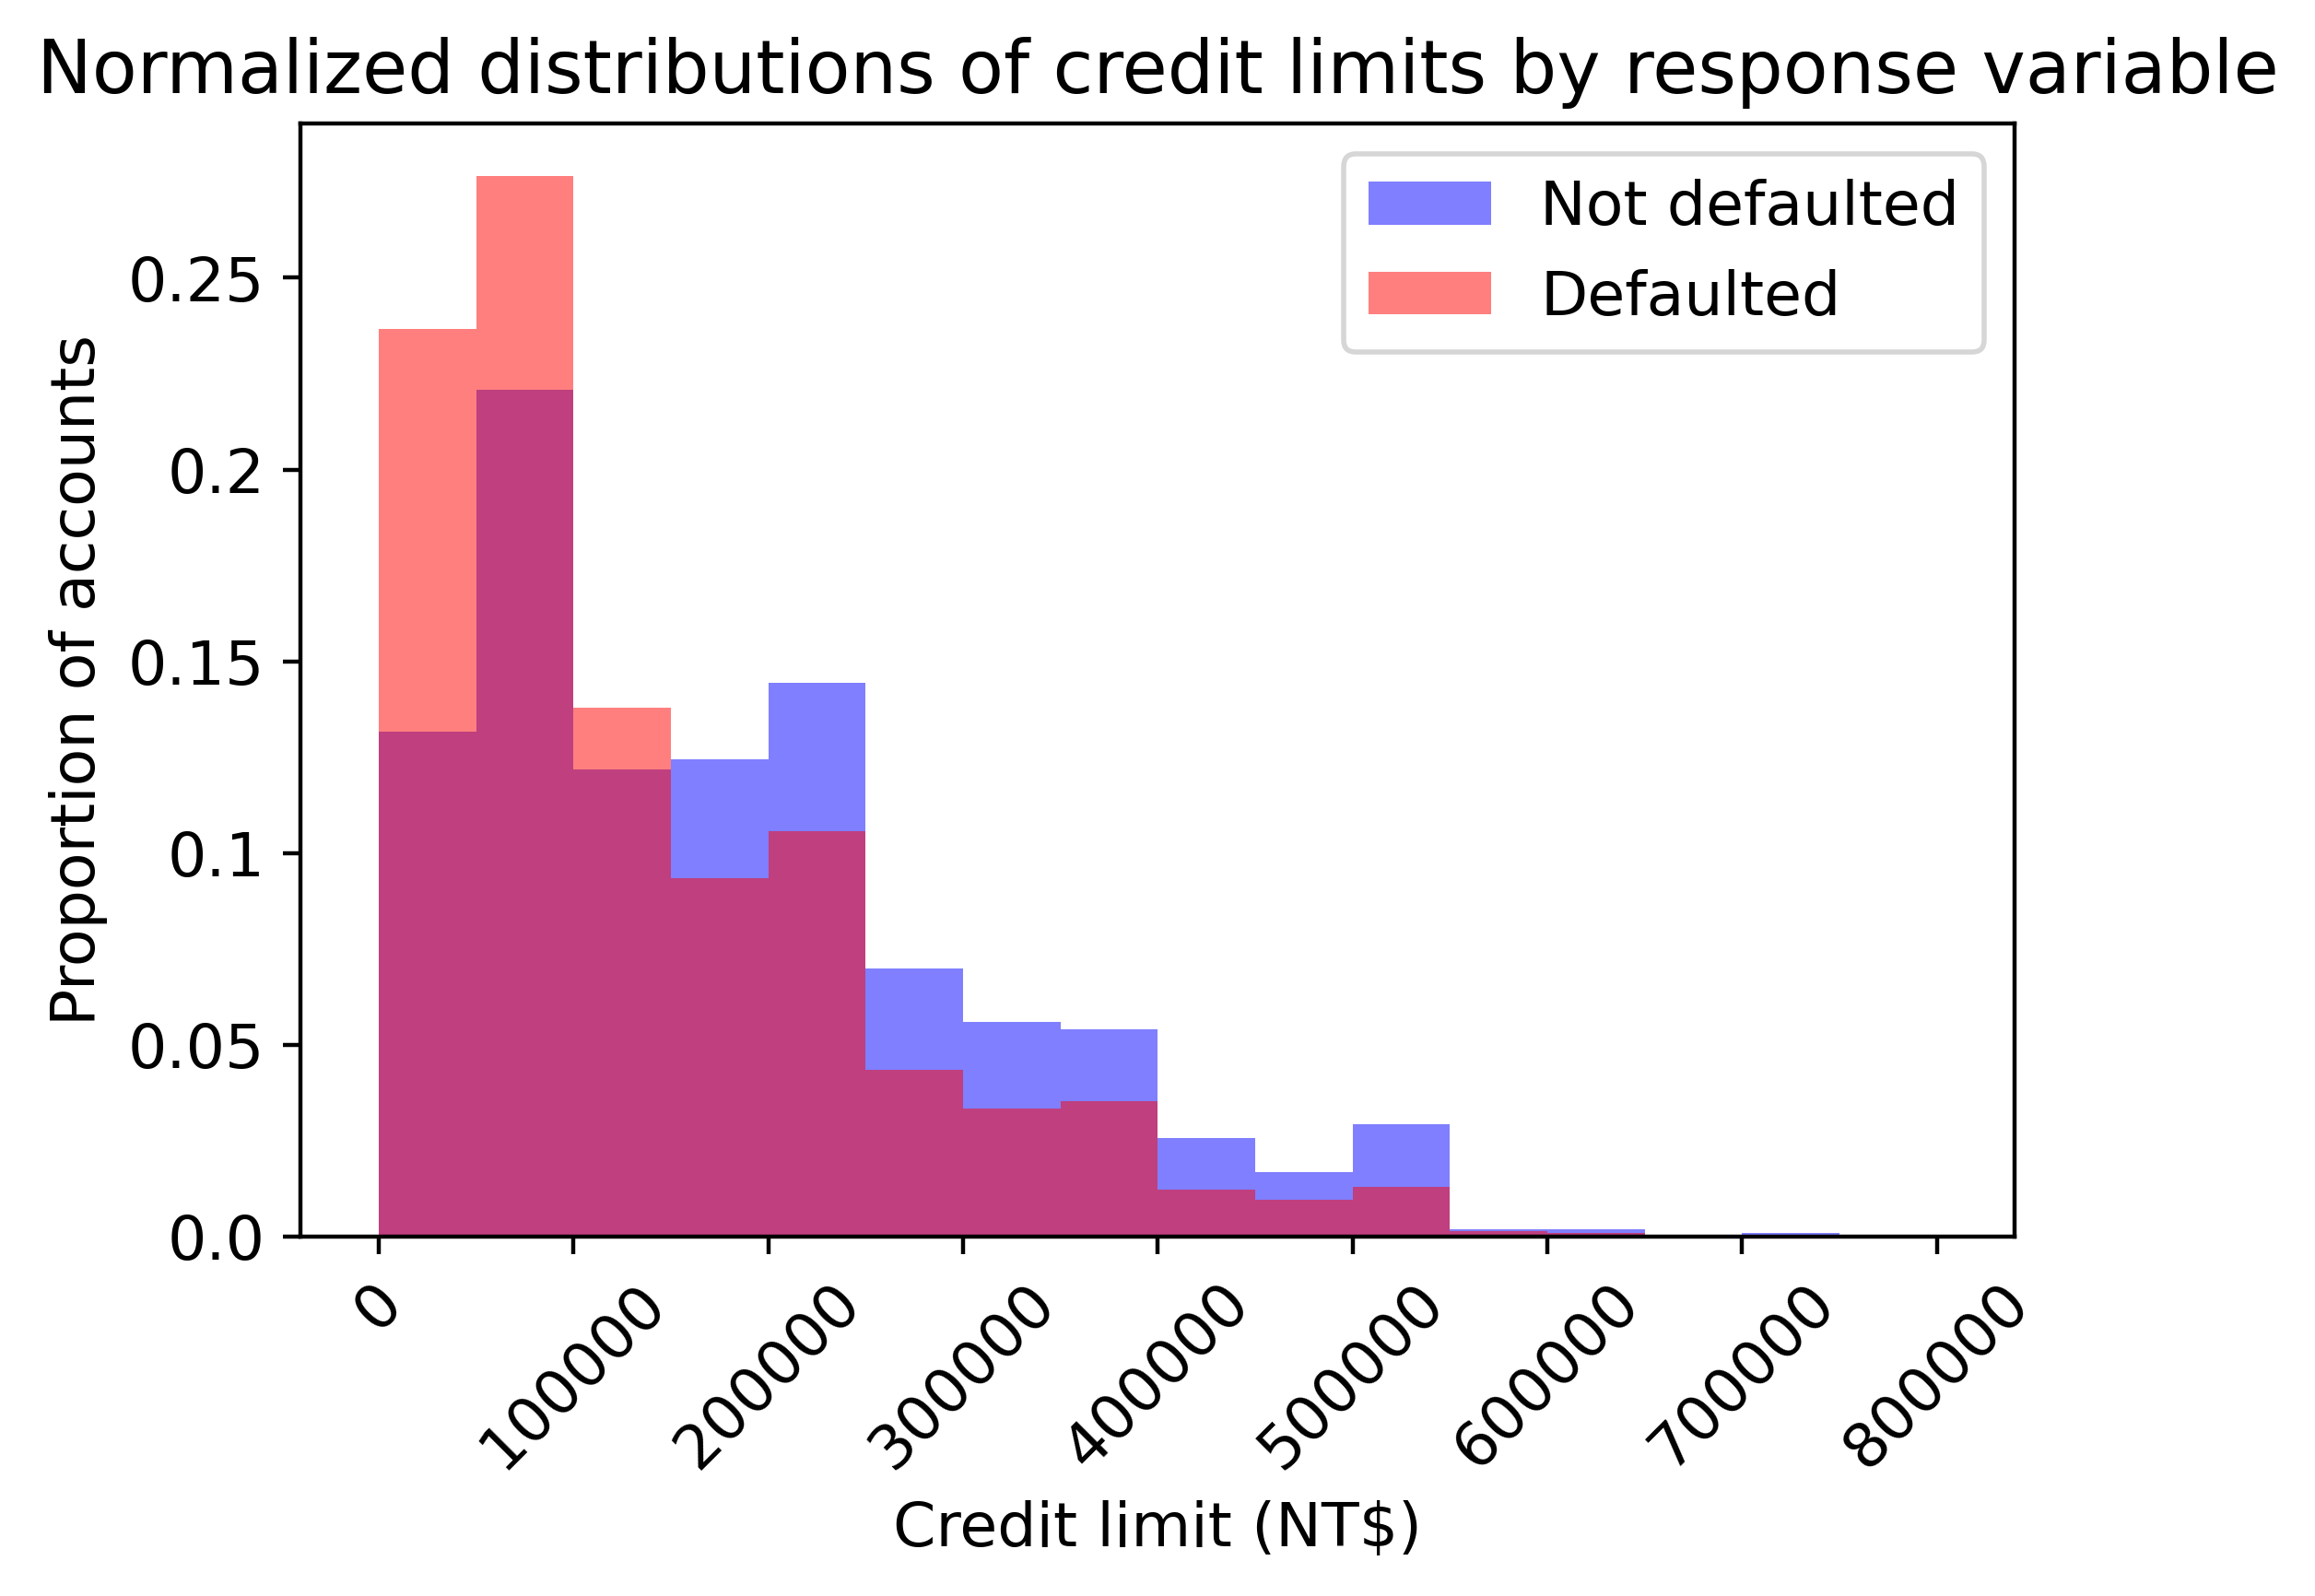

In [380]:
mpl.rcParams['figure.dpi'] = 400 
axes = plt.axes()
axes.hist(df.loc[neg_mask, 'LIMIT_BAL'], bins=bin_edges, alpha=0.5, density=True, color='blue')
axes.hist(df.loc[pos_mask, 'LIMIT_BAL'], bins=bin_edges, alpha=0.5, density=True, color='red')
axes.tick_params(axis='x', labelrotation=45)
axes.set_xlabel('Credit limit (NT$)')
axes.set_ylabel('Proportion of accounts')
y_ticks = axes.get_yticks()
axes.set_yticklabels(np.round(y_ticks*50000,2))
axes.legend(['Not defaulted', 'Defaulted'])
axes.set_title('Normalized distributions of credit limits by response variable')

In [381]:
np.mean([1,2,3,4,5])

3.0

In [382]:
def my_mean(input_argument):
    output = sum(input_argument)/len(input_argument)
    return(output)

In [383]:
X_exp = np.linspace(-4,4,81)
print(X_exp[:5])
print(X_exp[-5:])

[-4.  -3.9 -3.8 -3.7 -3.6]
[3.6 3.7 3.8 3.9 4. ]


In [384]:
Y_exp = np.exp(X_exp)

Text(0.5, 1.0, 'Plot of $e^X$')

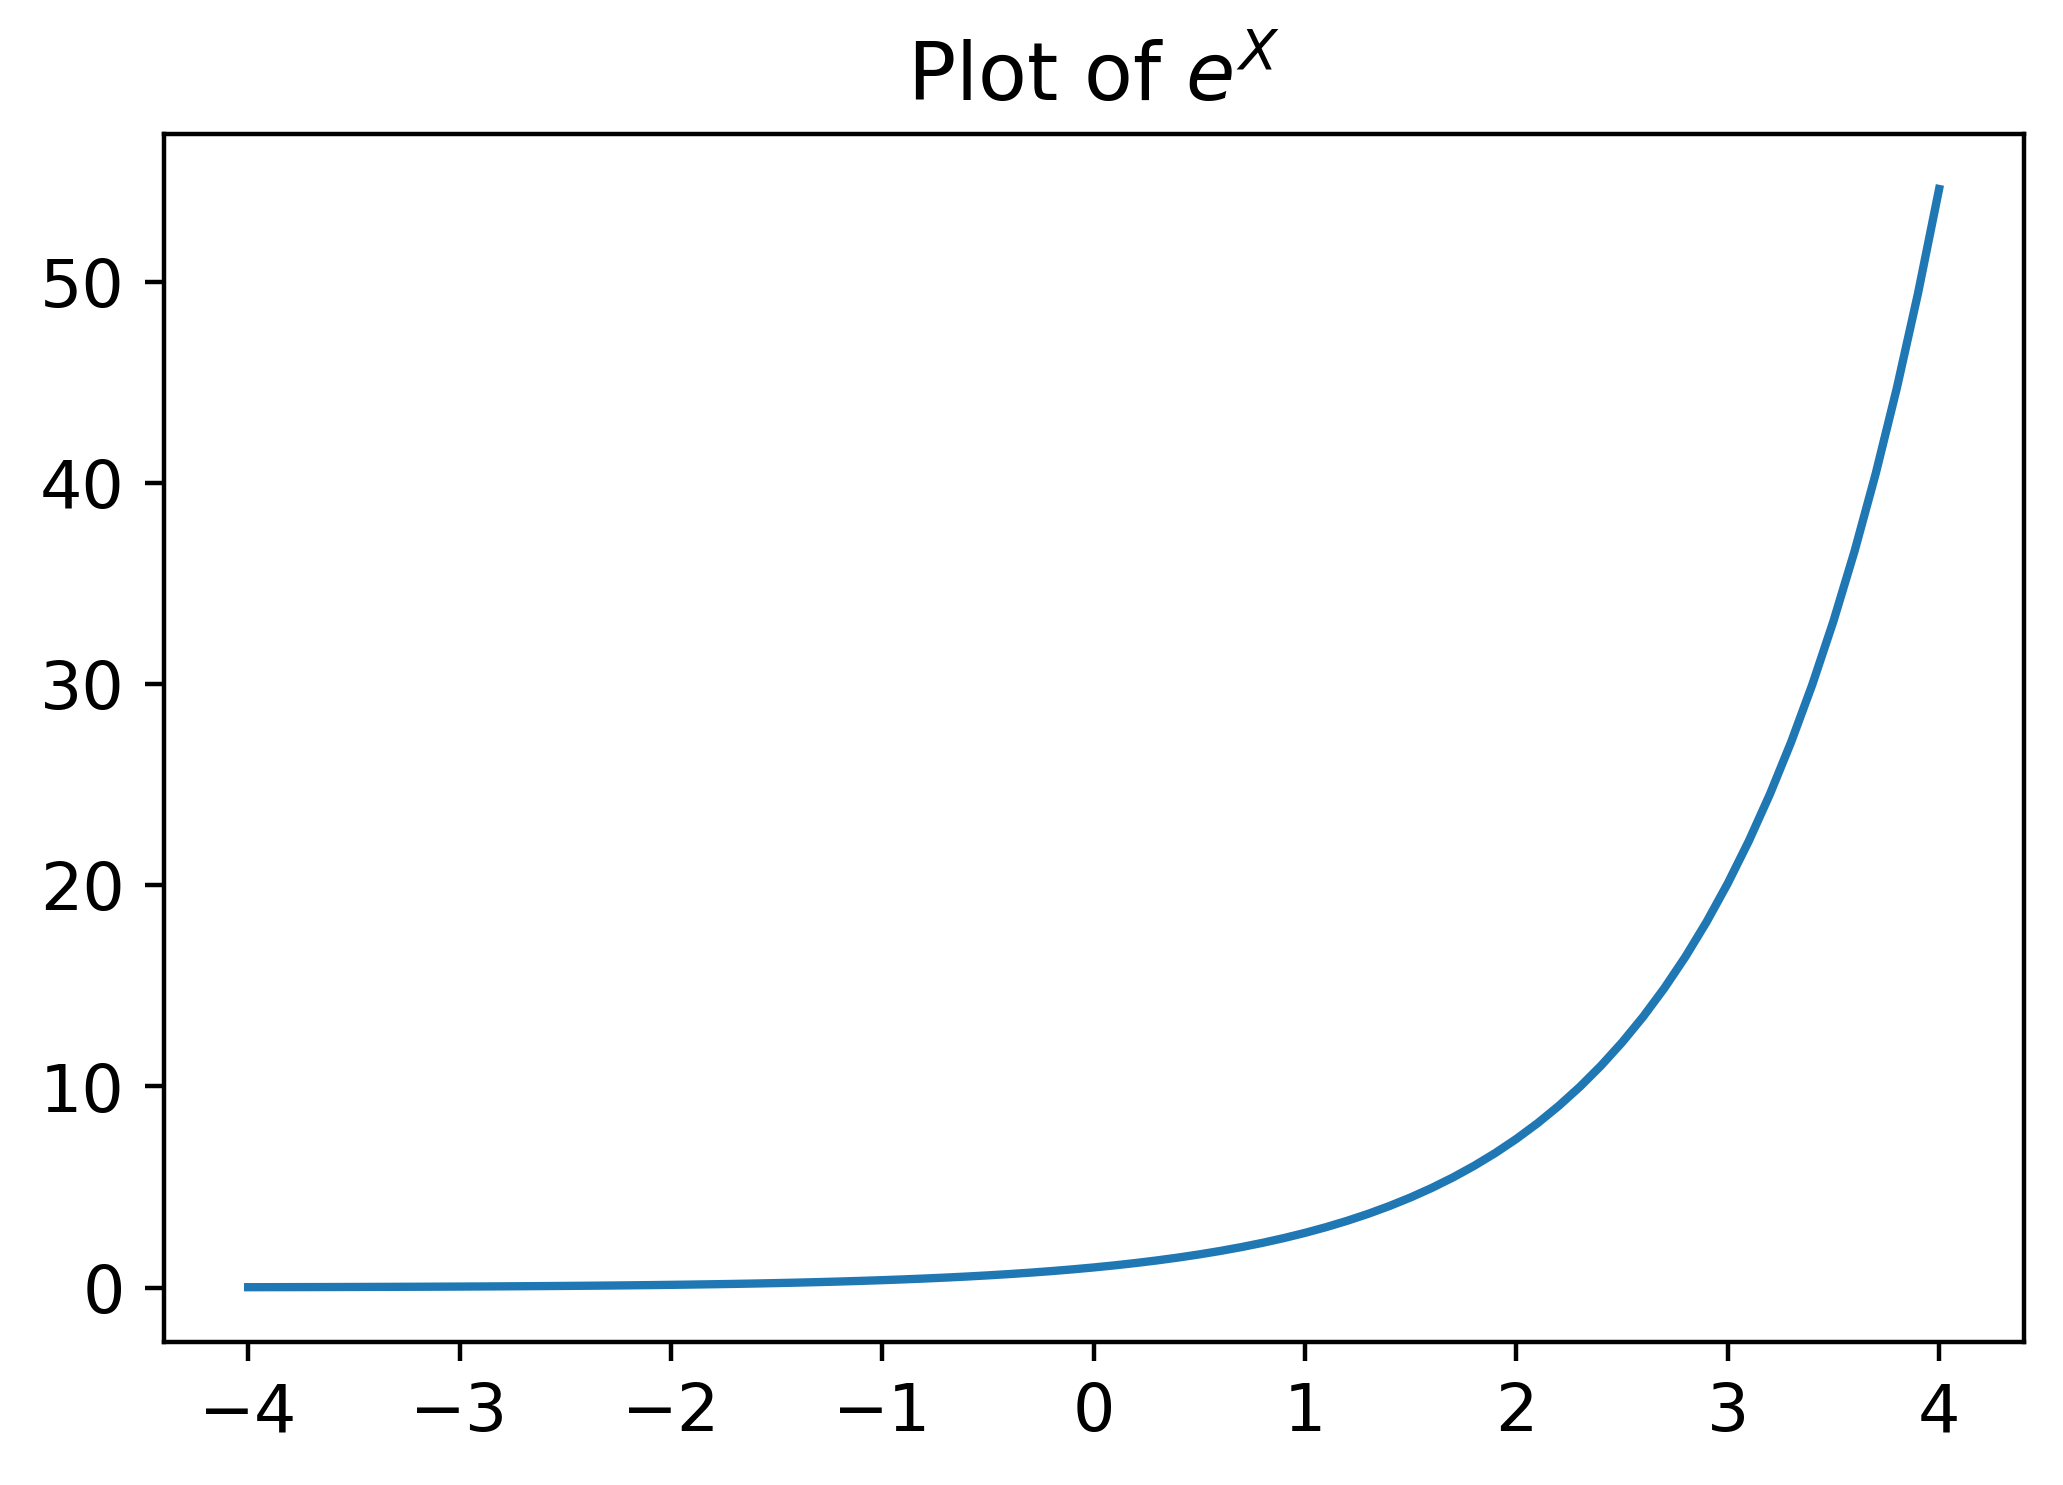

In [385]:
plt.plot(X_exp, Y_exp)
plt.title('Plot of $e^X$')

Text(0.5, 1.0, 'Plot of $e^{-X}$')

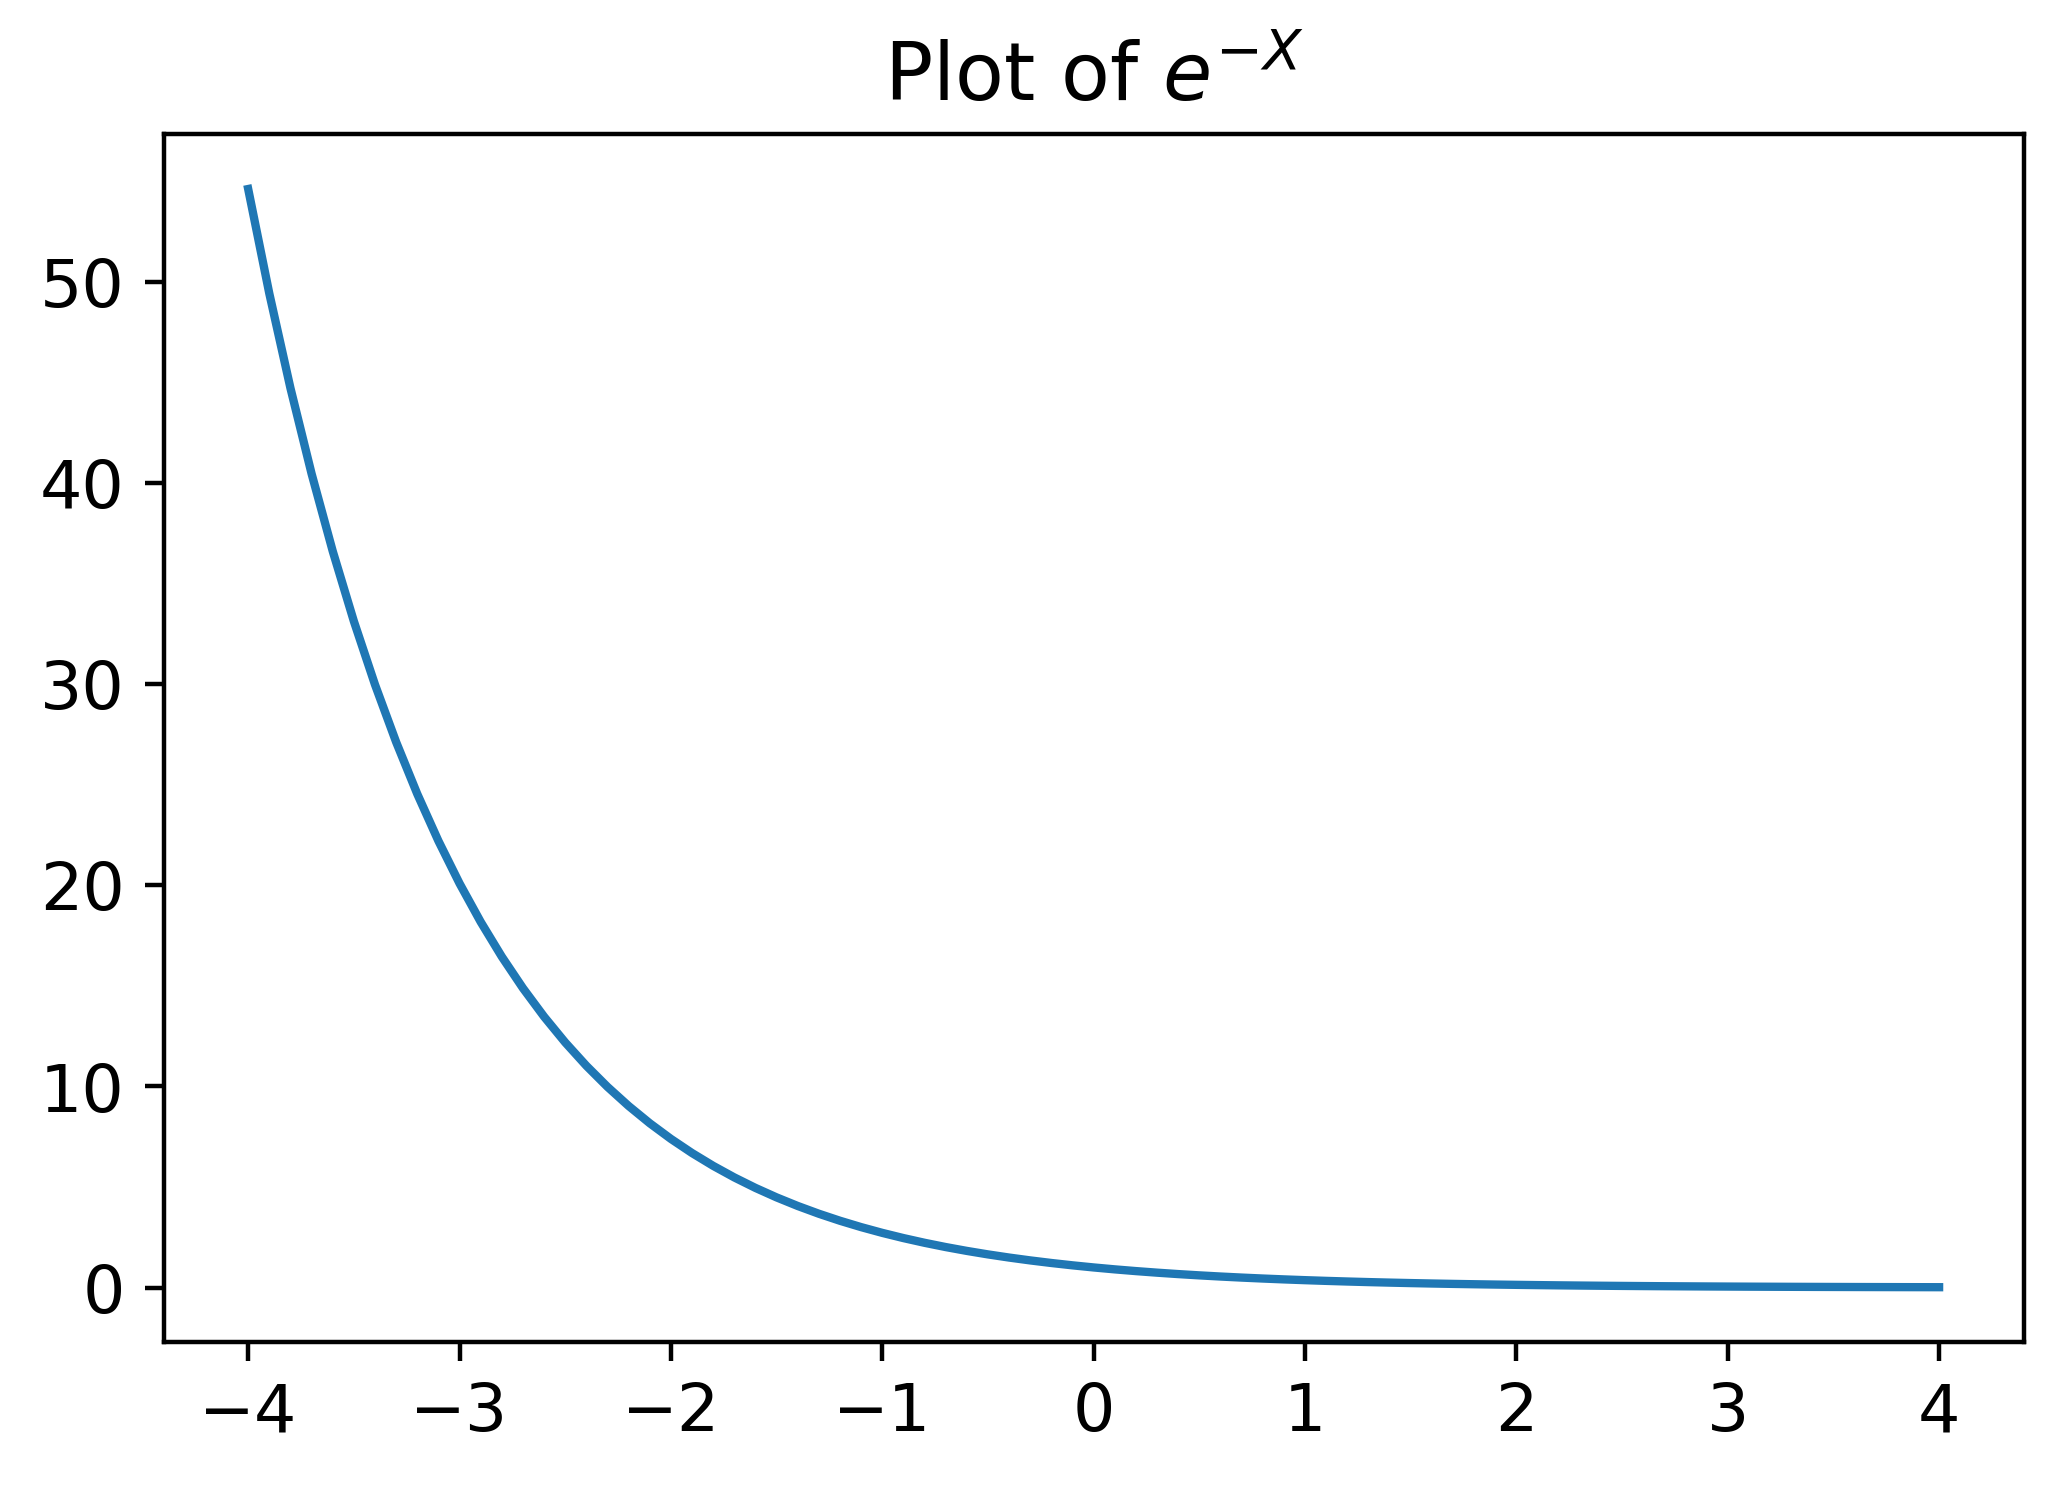

In [386]:
Y_exp = np.exp(-X_exp)
plt.plot(X_exp, Y_exp)
plt.title('Plot of $e^{-X}$')

In [387]:
def sigmoid(X):
    Y = 1 / (1 + np.exp(-X))
    return Y

Text(0.5, 1.0, 'The sigmoid function')

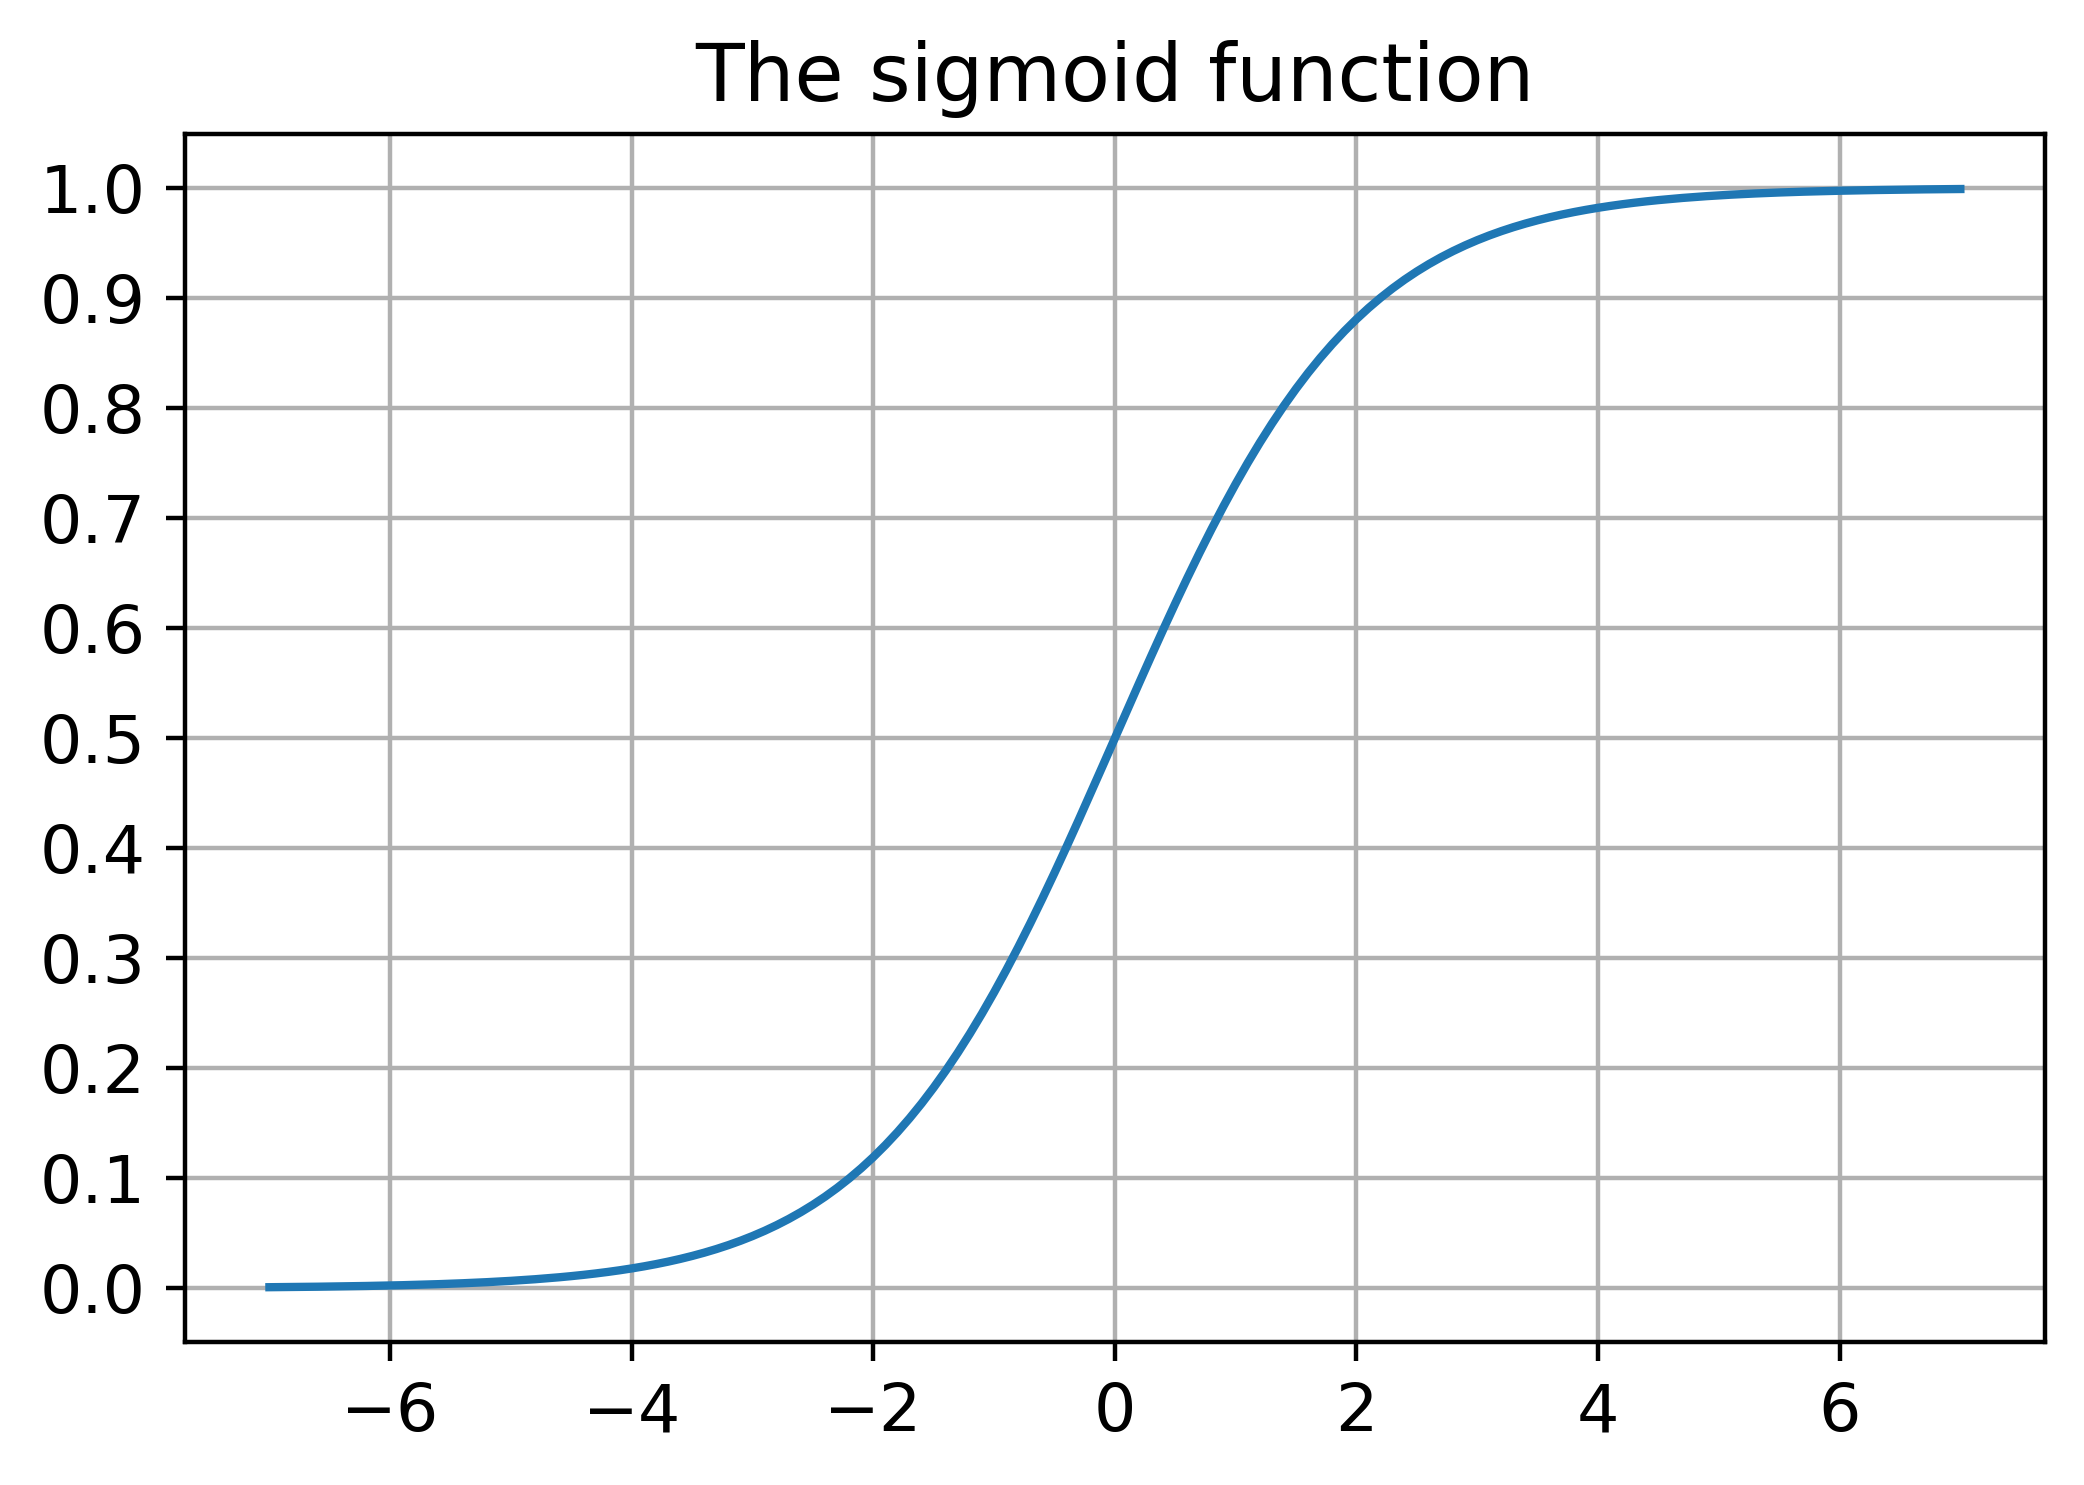

In [388]:
X_sig = np.linspace(-7,7,141)
Y_sig = sigmoid(X_sig)
plt.plot(X_sig,Y_sig)
plt.yticks(np.linspace(0,1,11))
plt.grid()
plt.title('The sigmoid function')

In [389]:
example_global_variable = 1
def example_function():
    output = example_global_variable + 1
    return(output)
example_function()

2

In [390]:
group_by_pay_mean_y

,default payment next month
PAY_1,
-2,0.131664
-1,0.170002
0,0.125280
1,0.336400
2,0.694701
3,0.773973
4,0.682540
5,0.434783
6,0.545455


In [391]:
p = group_by_pay_mean_y['default payment next month'].values

In [392]:
q = 1-p
print(p)
print(q)

[0.13166397 0.17000198 0.12527981 0.33639988 0.69470143 0.7739726
 0.68253968 0.43478261 0.54545455 0.77777778 0.58823529]
[0.86833603 0.82999802 0.87472019 0.66360012 0.30529857 0.2260274
 0.31746032 0.56521739 0.45454545 0.22222222 0.41176471]


In [393]:
odds_ratio = p/q
log_odds = np.log(odds_ratio)
log_odds

array([-1.88632574, -1.58561322, -1.94335435, -0.67937918,  0.82219194,
        1.23088026,  0.76546784, -0.26236426,  0.18232156,  1.25276297,
        0.35667494])

In [394]:
group_by_pay_mean_y.index

Int64Index([-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64', name='PAY_1')

Text(0.5, 0, 'Values of PAY_1')

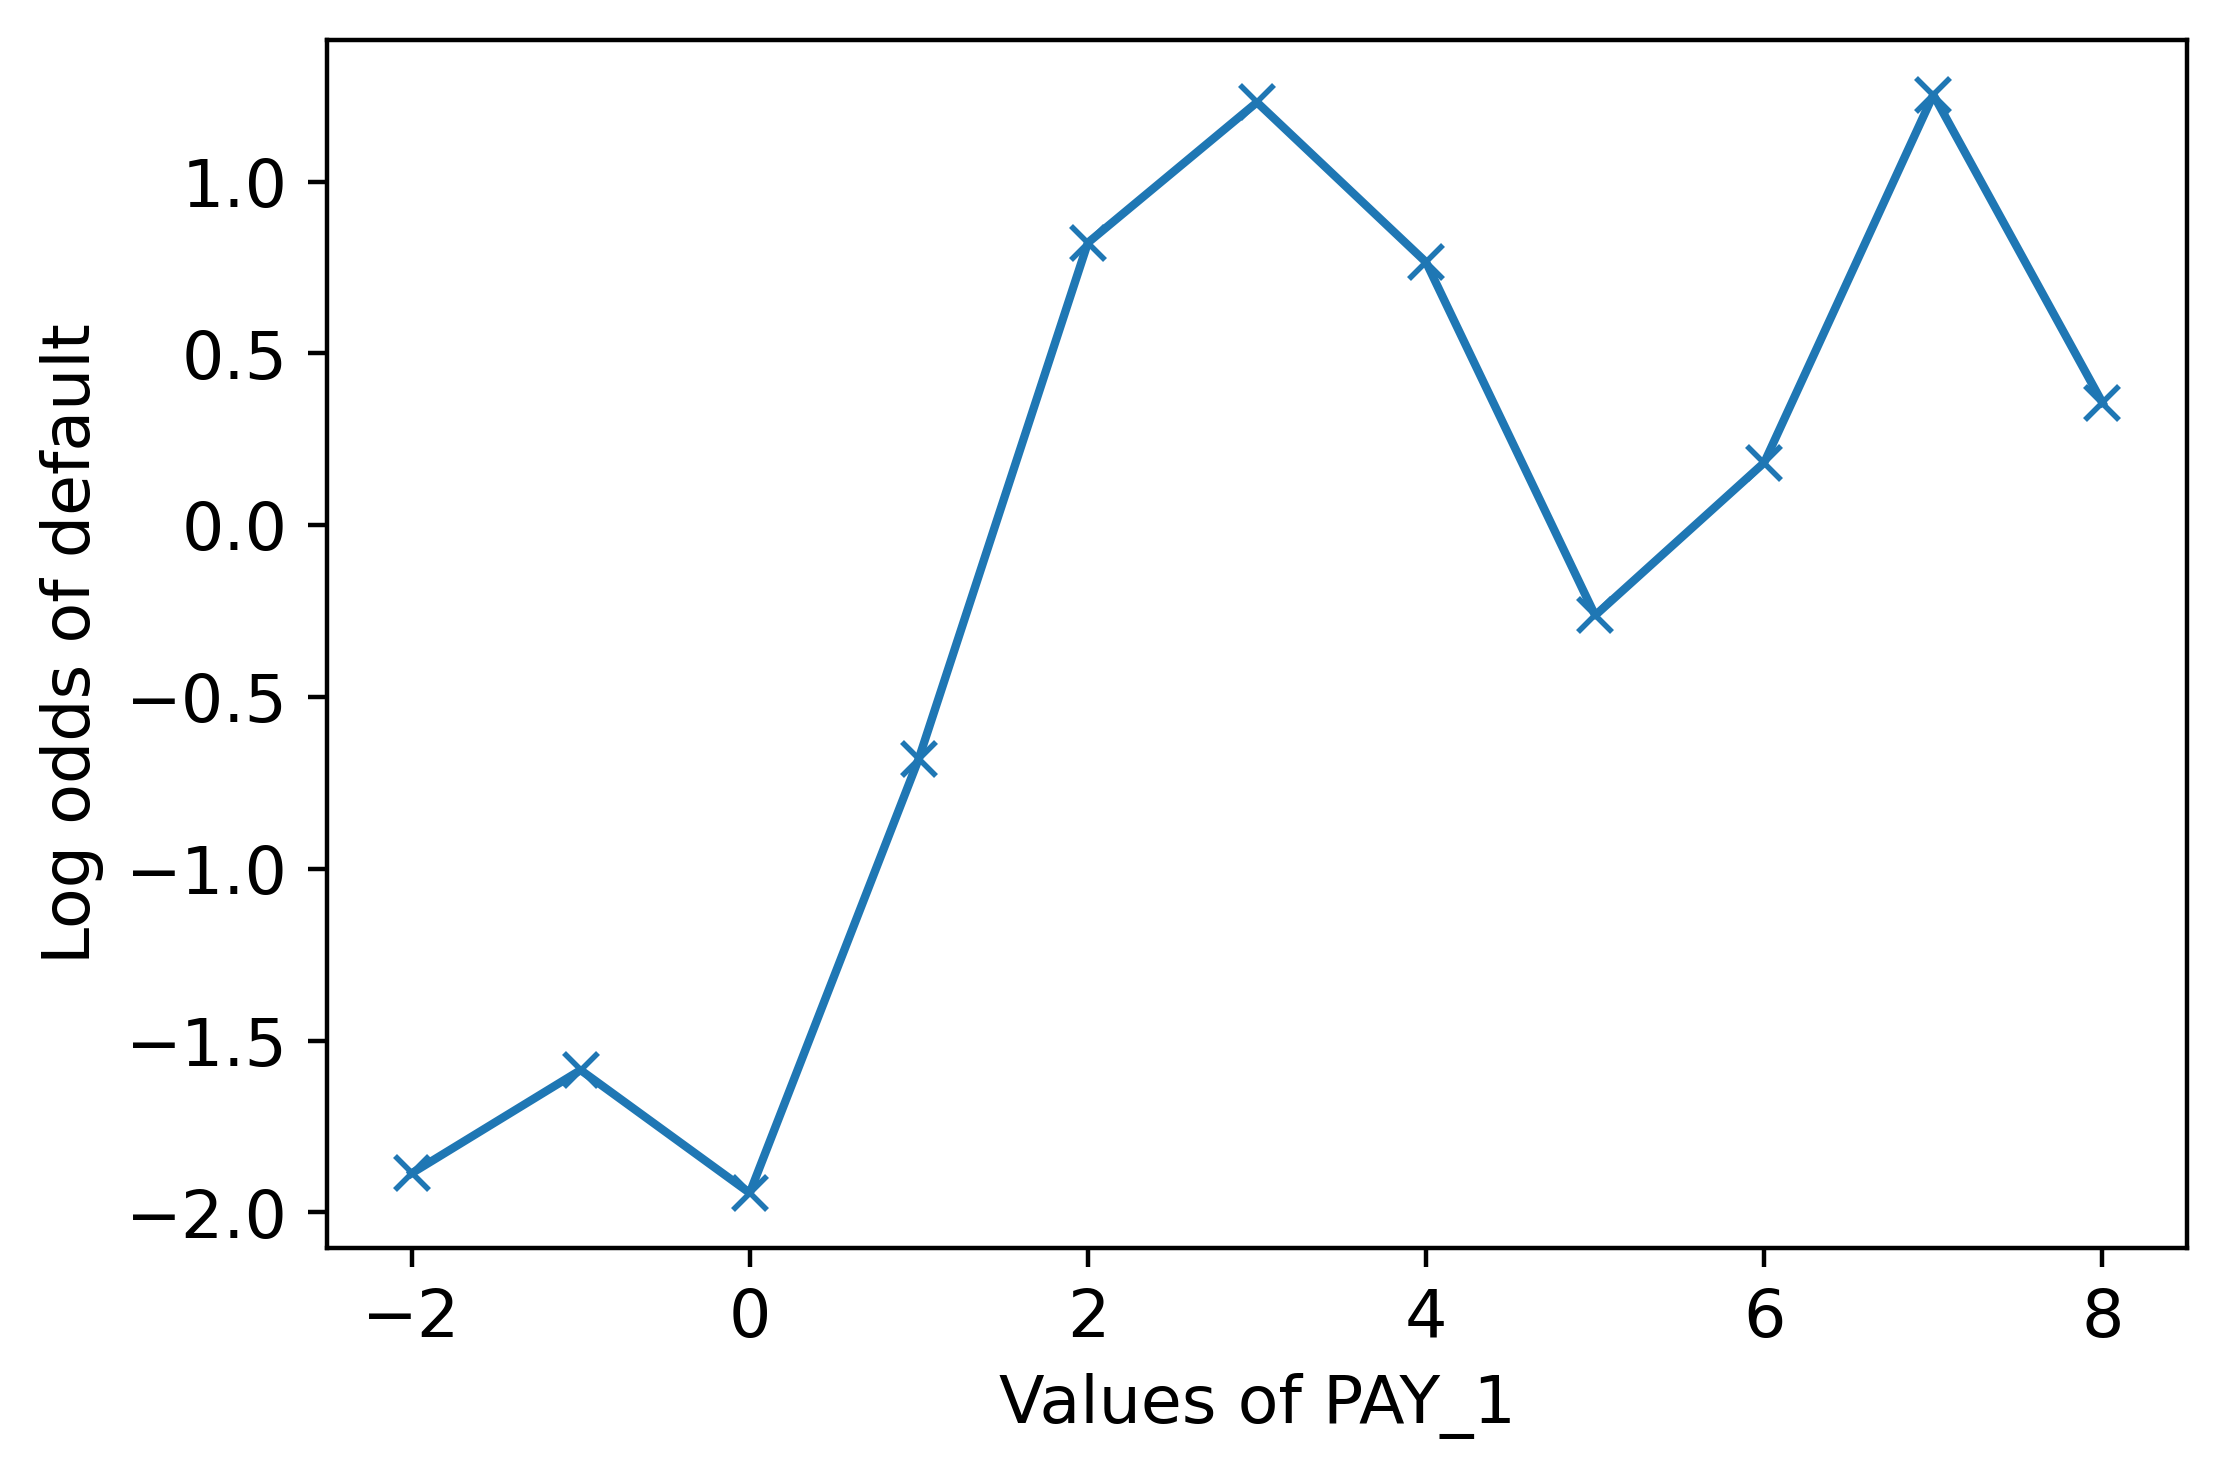

In [395]:
plt.plot(group_by_pay_mean_y.index, log_odds, '-x')
plt.ylabel('Log odds of default')
plt.xlabel('Values of PAY_1')

In [396]:
np.random.seed(seed=6)
X_1_pos = np.random.uniform(low=1, high=7, size=(20,1))
print(X_1_pos[0:3])
X_1_neg = np.random.uniform(low=3, high=10, size=(20,1))
print(X_1_neg[0:3])
X_2_pos = np.random.uniform(low=1, high=7, size=(20,1))
print(X_1_pos[0:3])
X_2_neg = np.random.uniform(low=3, high=10, size=(20,1))
print(X_1_neg[0:3])

[[6.35716091]
 [2.99187883]
 [5.92737474]]
[[3.38132155]
 [8.03046066]
 [8.61519394]]
[[6.35716091]
 [2.99187883]
 [5.92737474]]
[[3.38132155]
 [8.03046066]
 [8.61519394]]


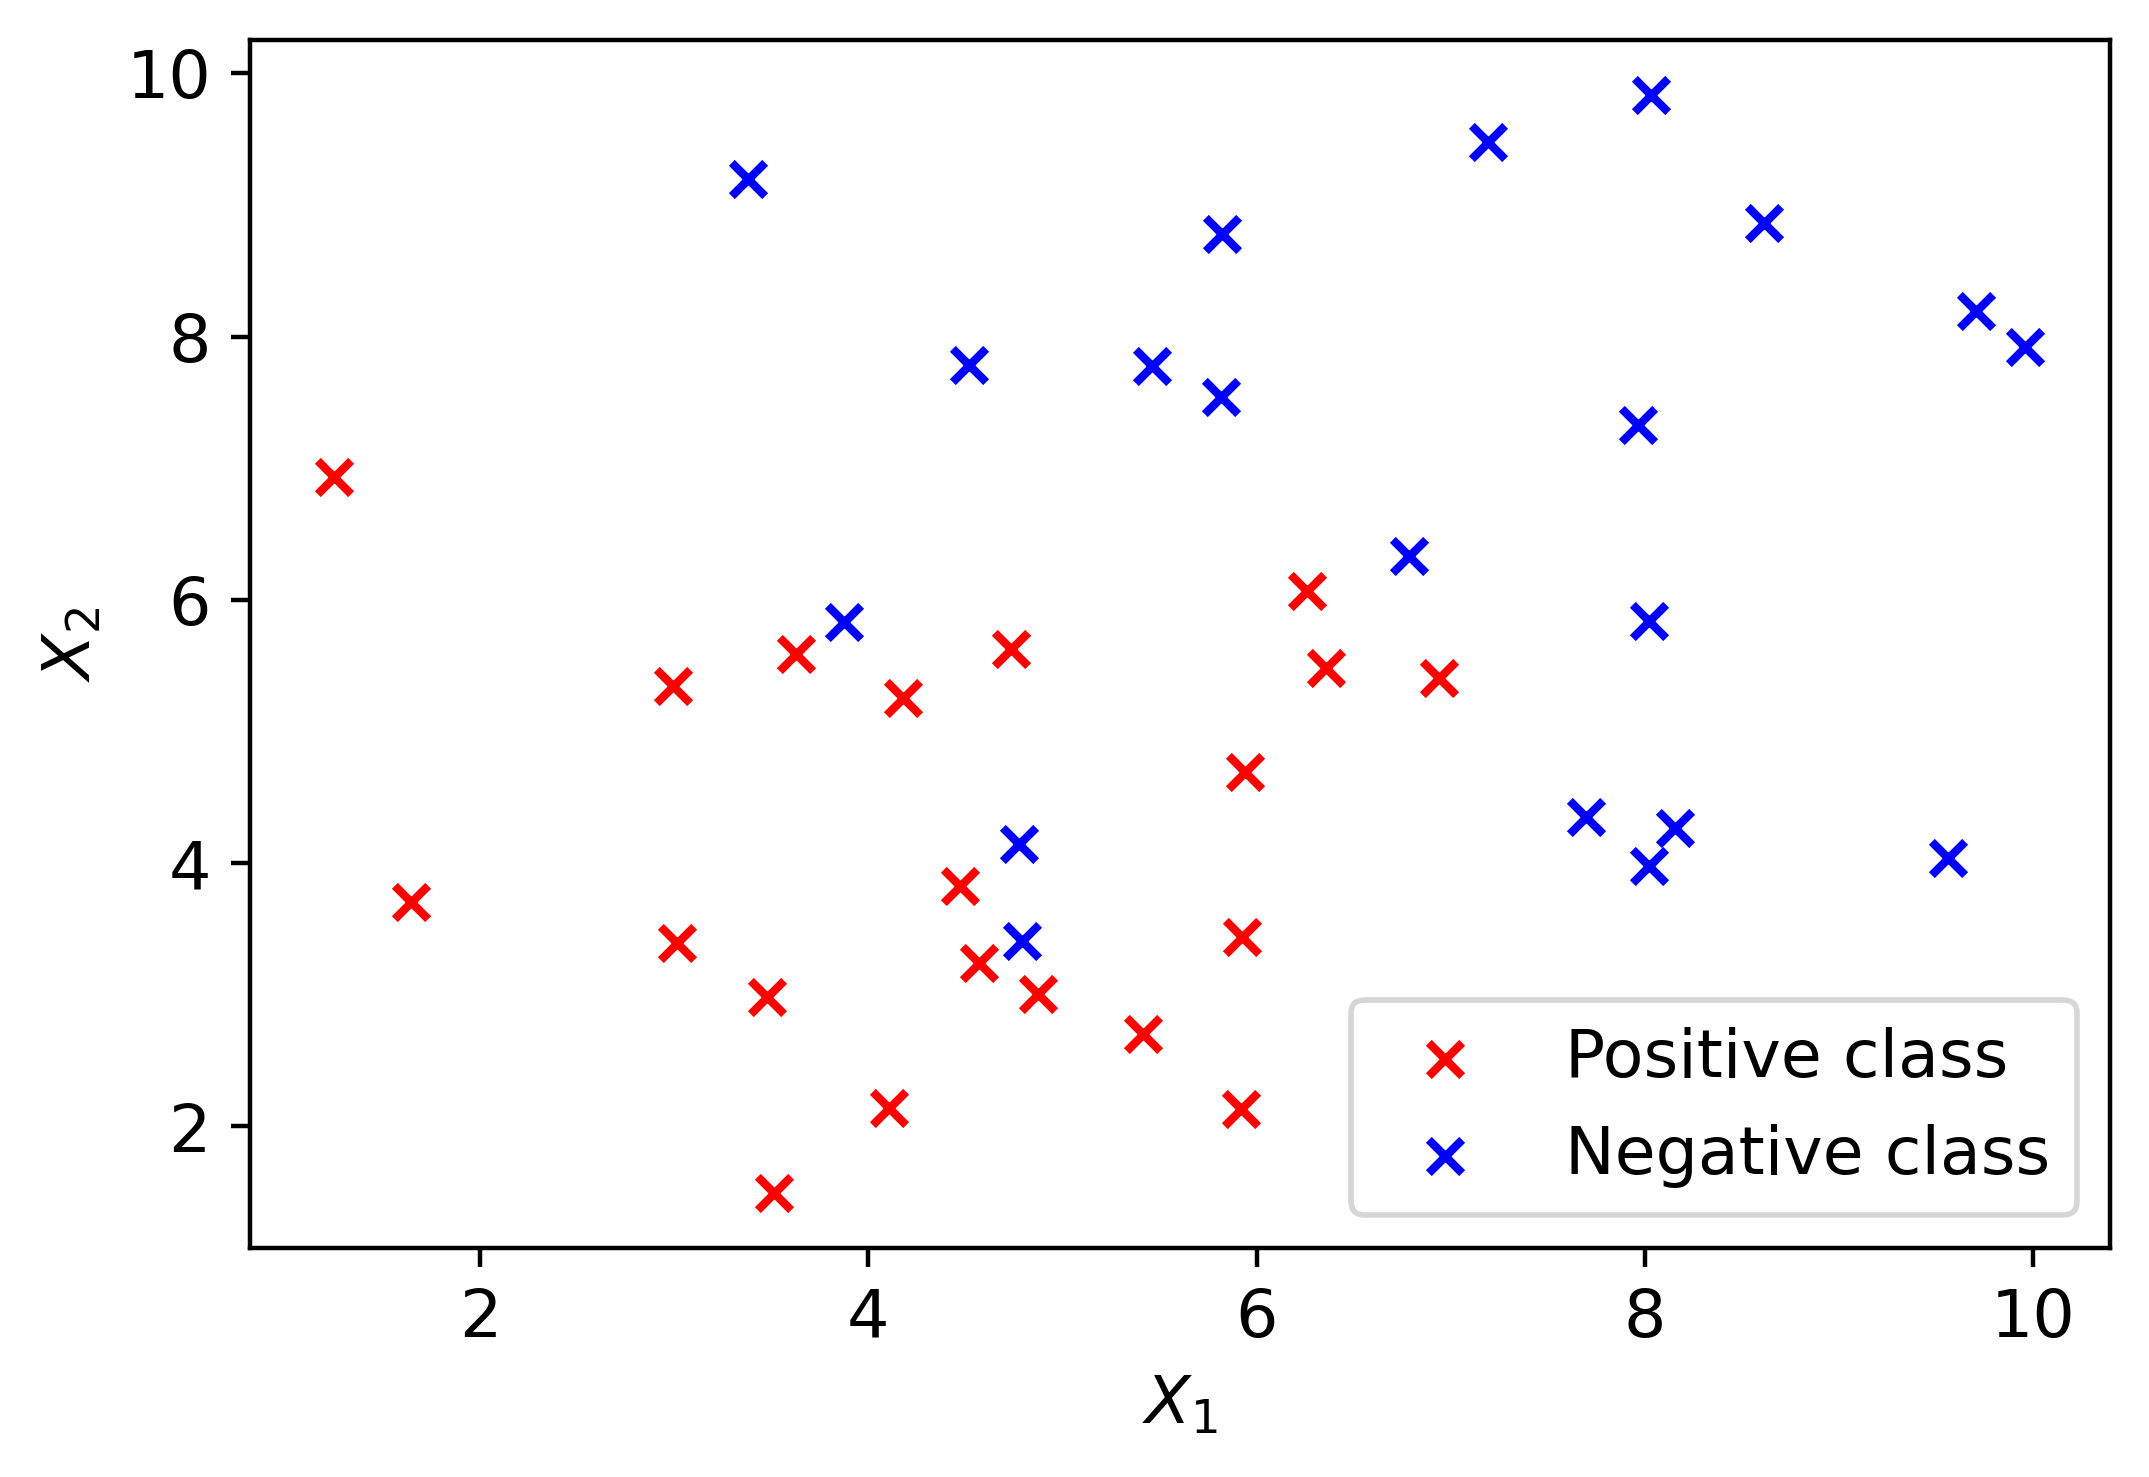

In [397]:
plt.scatter(X_1_pos, X_2_pos, color='red', marker='x')
plt.scatter(X_1_neg, X_2_neg, color='blue', marker='x')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend(['Positive class', 'Negative class'])

In [398]:
X = np.block([[X_1_pos, X_2_pos], [X_1_neg, X_2_neg]])
print(X.shape)
print(X[0:3])

(40, 2)
[[6.35716091 5.4790643 ]
 [2.99187883 5.3444234 ]
 [5.92737474 3.43664678]]


In [399]:
y = np.vstack((np.ones((20,1)), np.zeros((20,1)))).reshape(40,)
print(y[0:5])
print(y[-5:])

[1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0.]


In [400]:
from sklearn.linear_model import LogisticRegression
example_lr = LogisticRegression(solver='liblinear')
example_lr

LogisticRegression(solver='liblinear')

In [401]:
example_lr.fit(X, y)

LogisticRegression(solver='liblinear')

In [402]:
y_pred = example_lr.predict(X)
positive_indices = [counter for counter in range(len(y_pred)) if y_pred[counter]==1]
negative_indices = [counter for counter in range(len(y_pred)) if y_pred[counter]==0]
positive_indices

[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 16, 17, 32, 38]

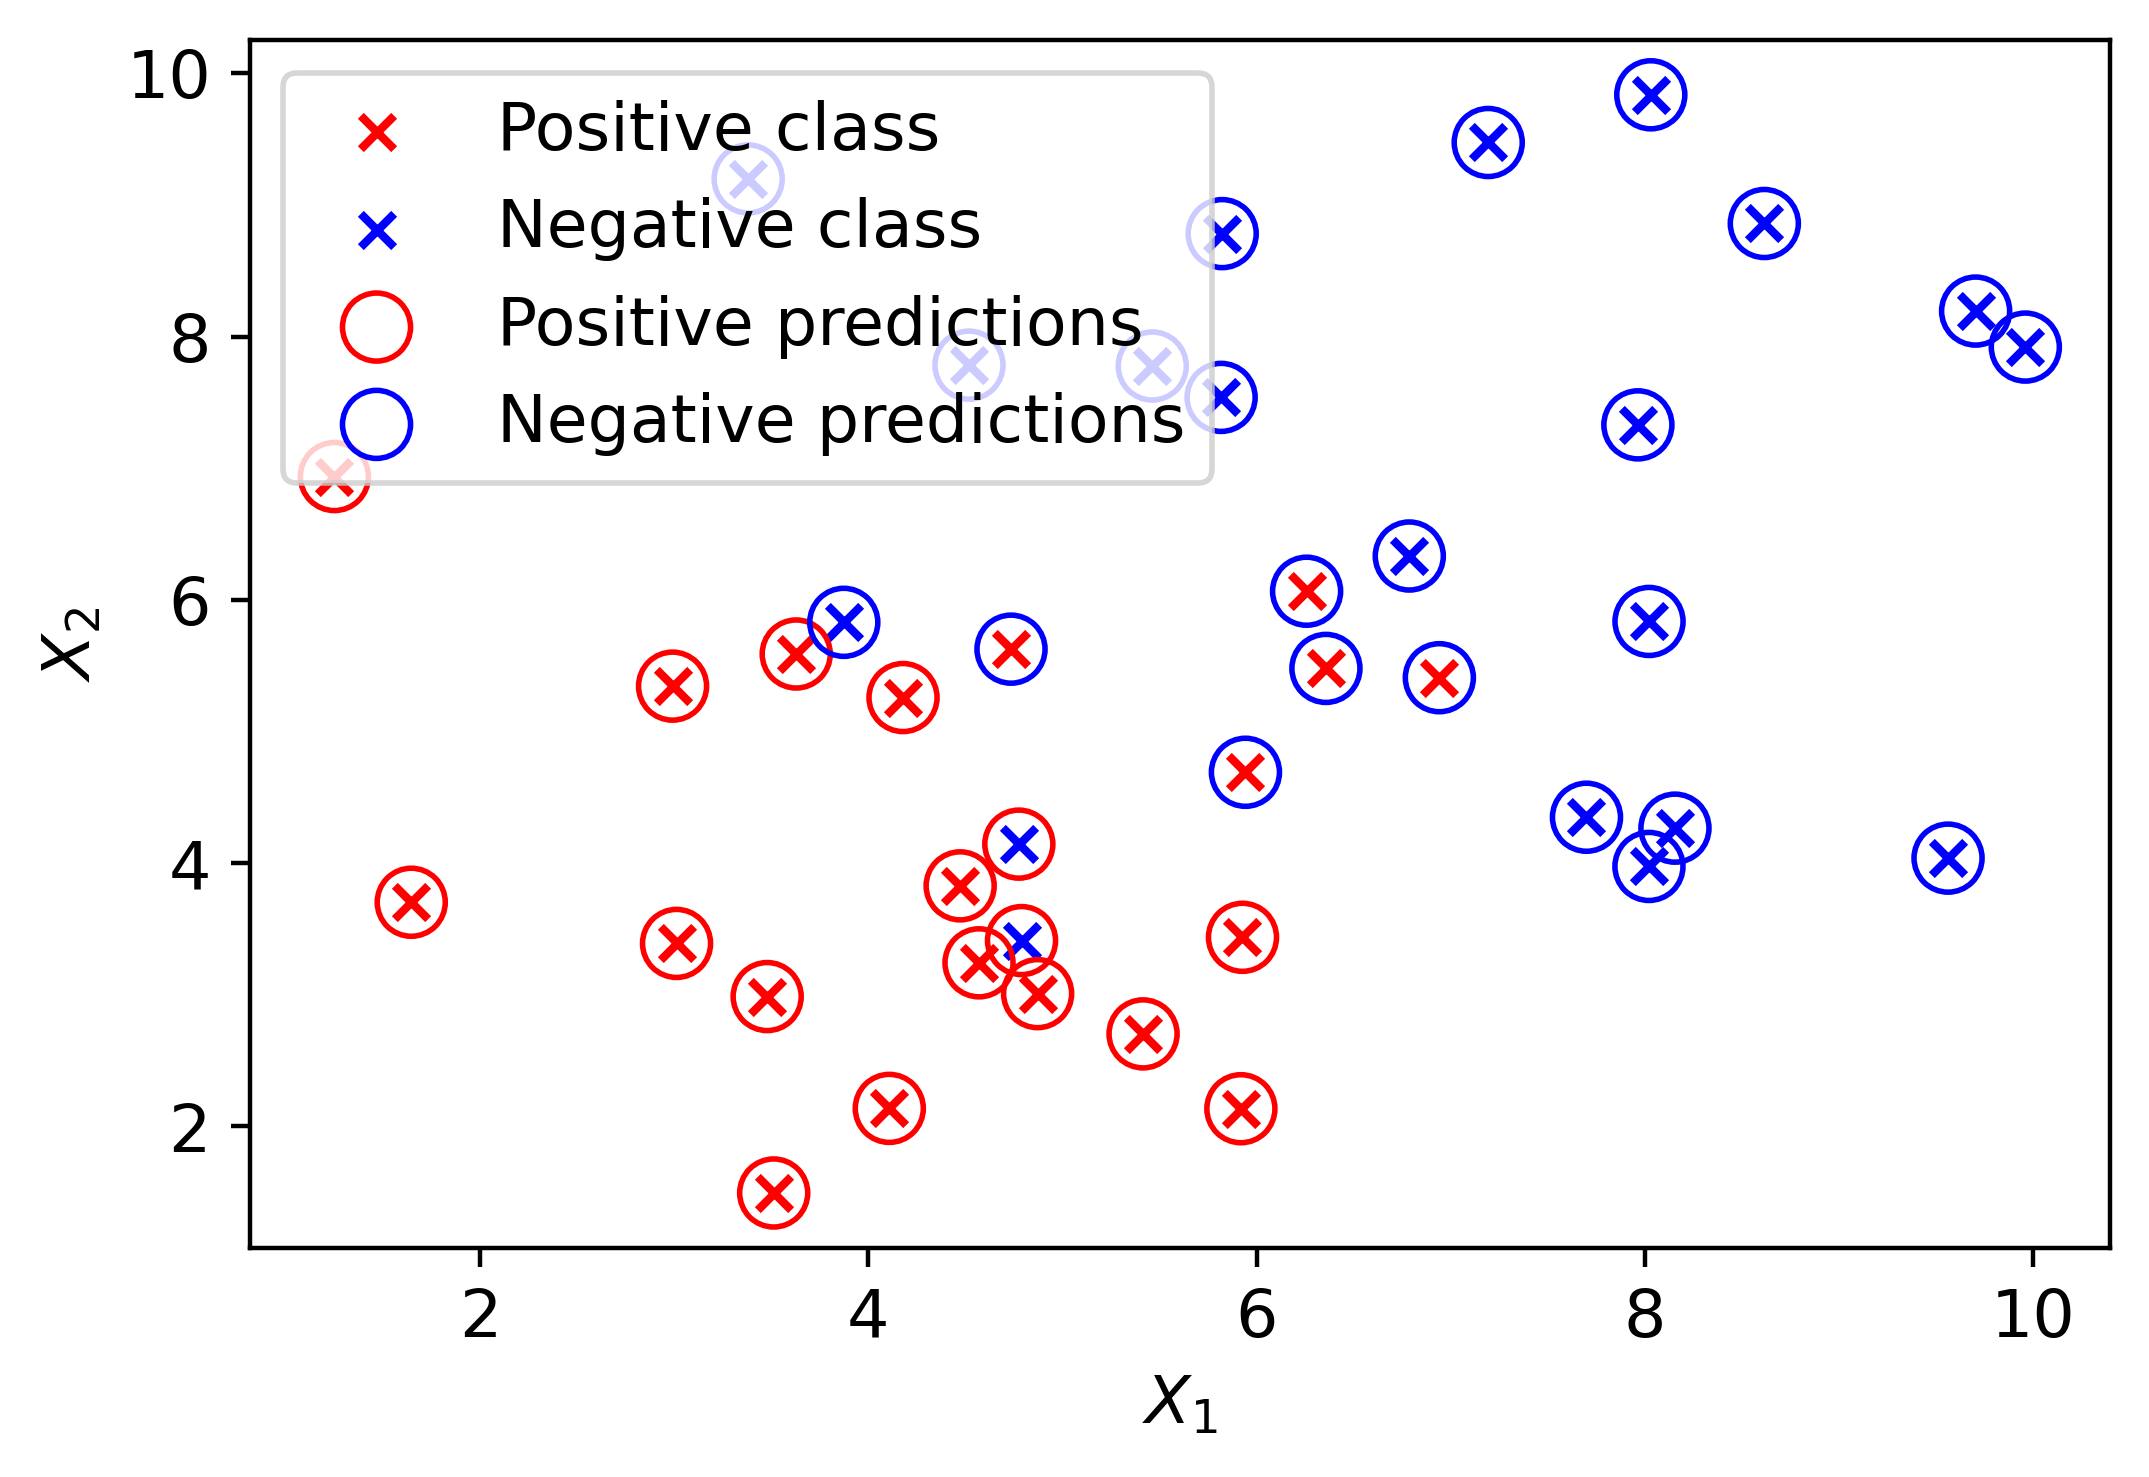

In [403]:
plt.scatter(X_1_pos, X_2_pos, color='red', marker='x')
plt.scatter(X_1_neg, X_2_neg, color='blue', marker='x')
plt.scatter(X[positive_indices,0], X[positive_indices,1], s=150, marker='o',
            edgecolors='red', facecolors='none')
plt.scatter(X[negative_indices,0], X[negative_indices,1], s=150, marker='o',
            edgecolors='blue', facecolors='none')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend(['Positive class', 'Negative class', 'Positive predictions', 'Negative predictions'])

In [404]:
theta_1 = example_lr.coef_[0][0]
theta_2 = example_lr.coef_[0][1]
print(theta_1, theta_2)

-0.20245058016285844 -0.25336423626773213


In [405]:
theta_0 = example_lr.intercept_

In [406]:
X_1_decision_boundary = np.array([0, 10])
X_2_decision_boundary = -(theta_1/theta_2)*X_1_decision_boundary - (theta_0/theta_2)

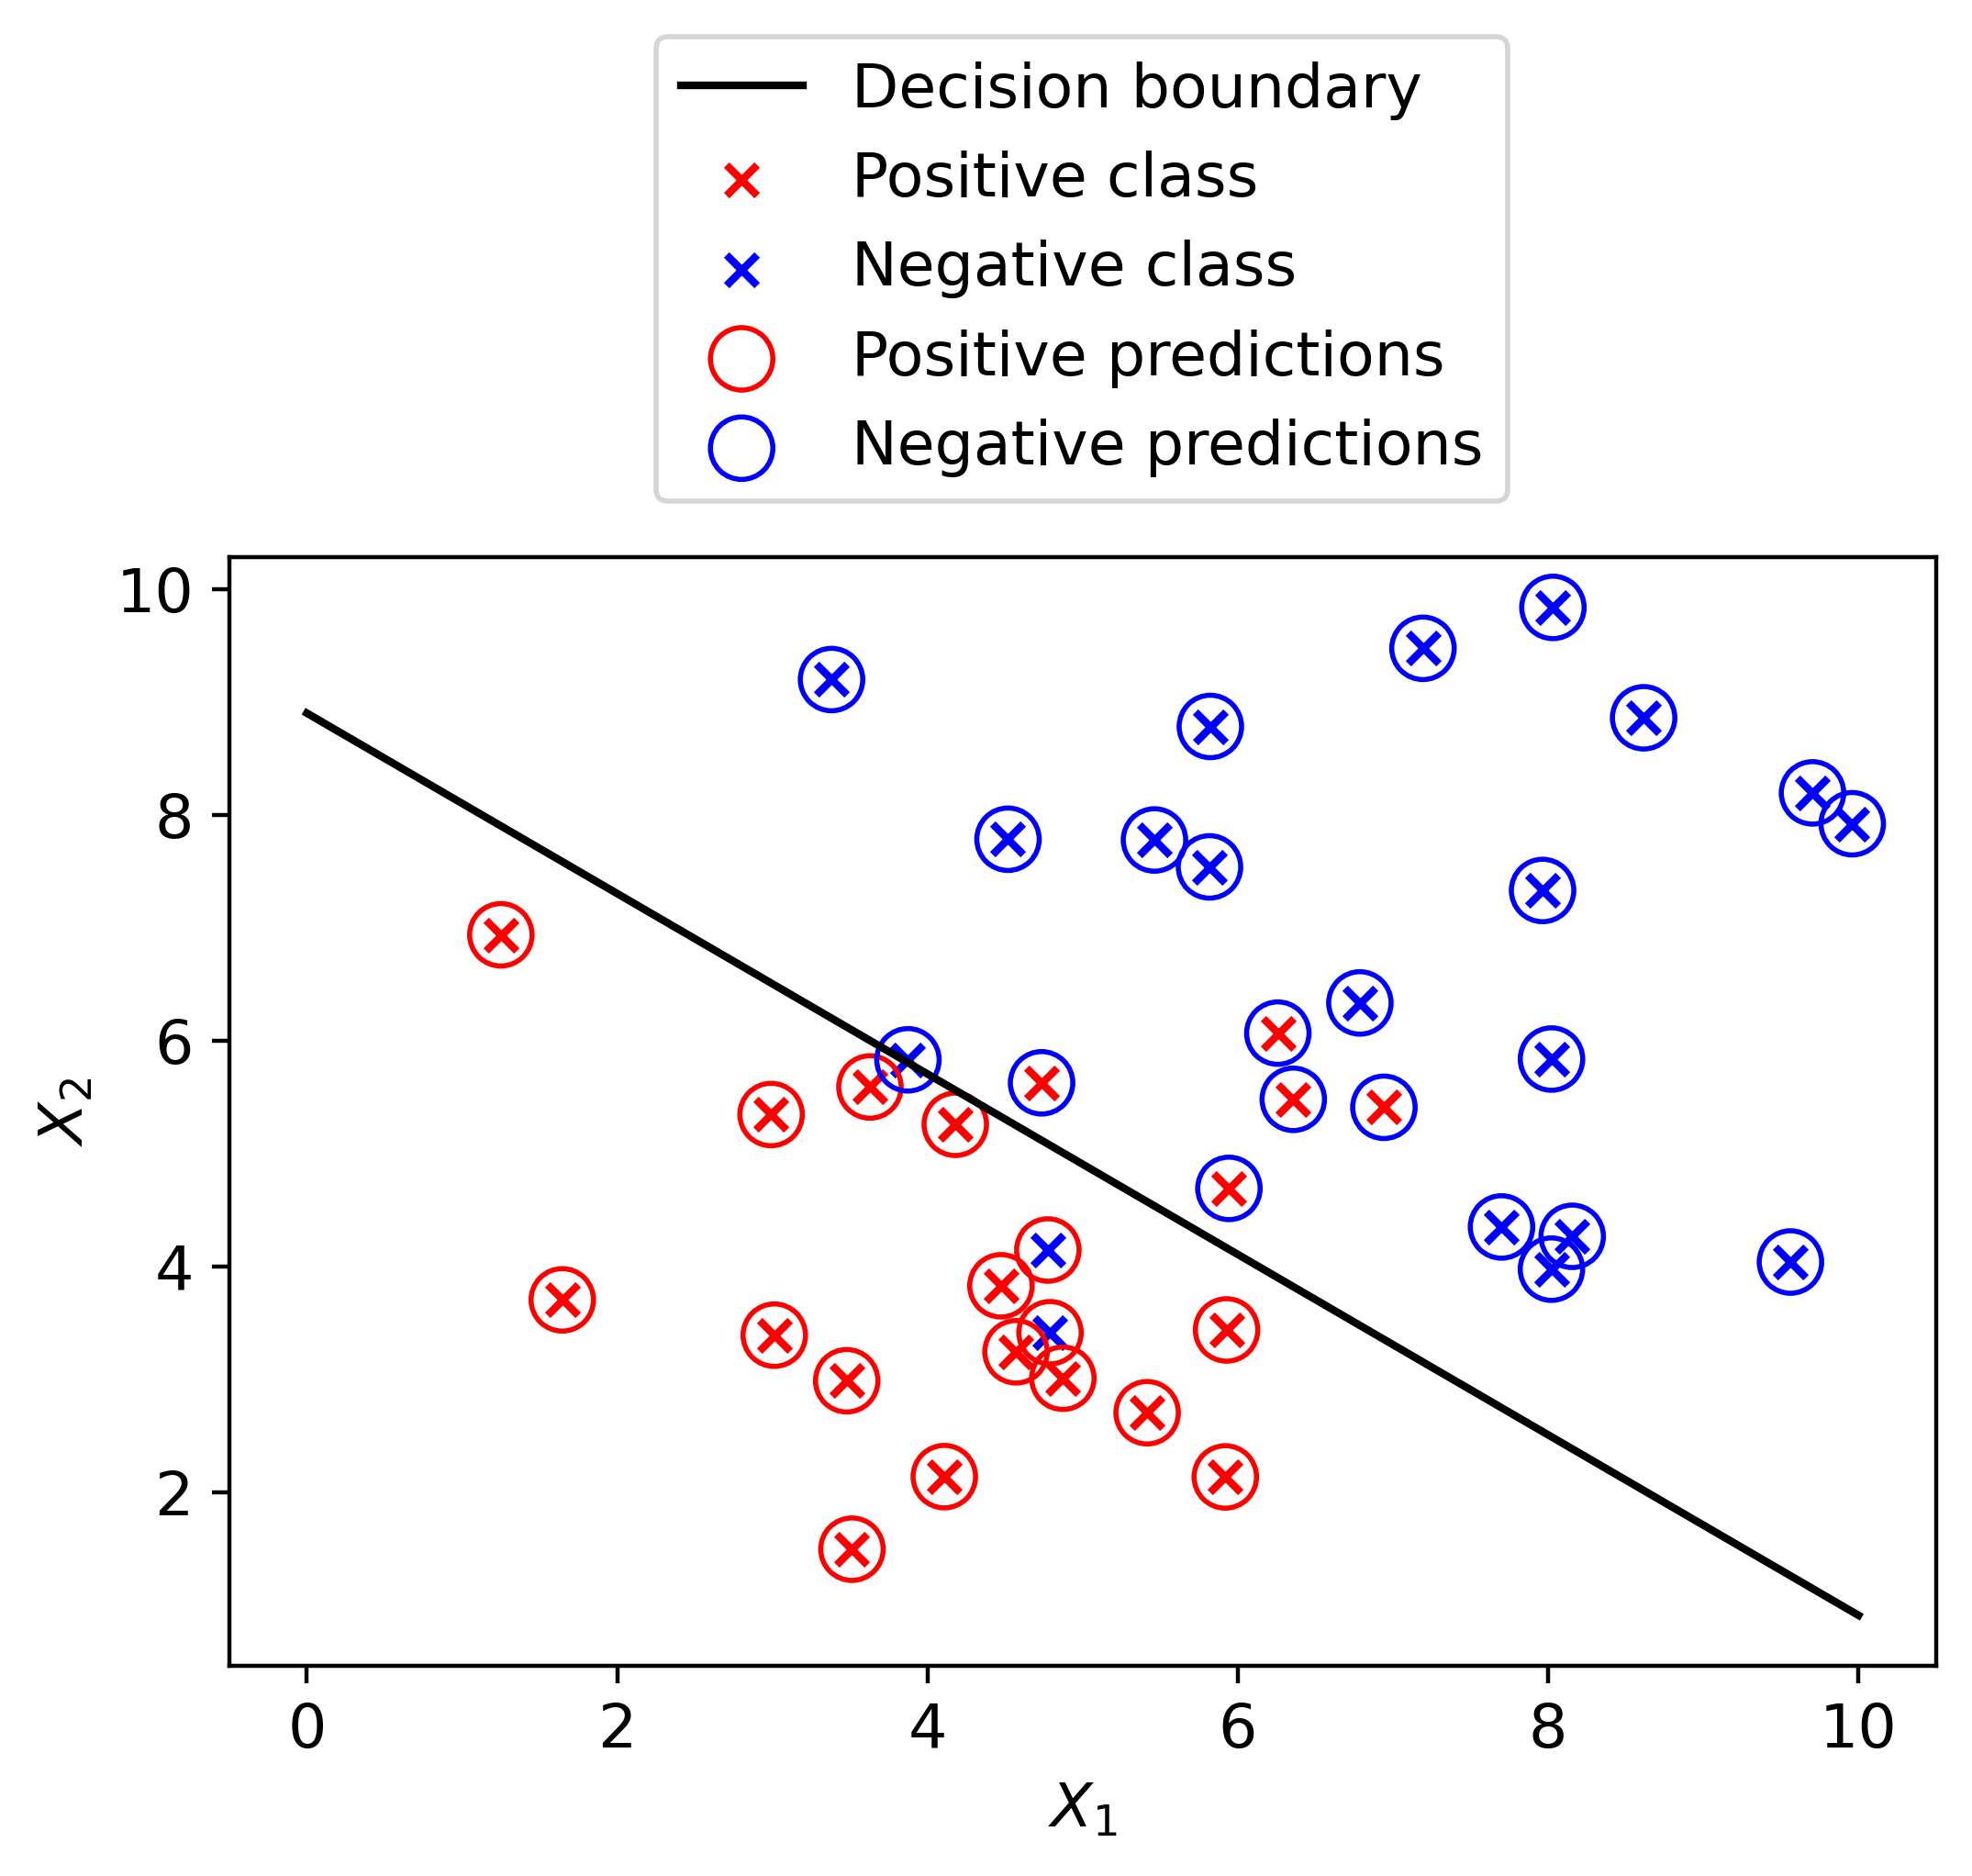

In [407]:
pos_true = plt.scatter(X_1_pos, X_2_pos, color='red', marker='x', label='Positive class')
neg_true = plt.scatter(X_1_neg, X_2_neg, color='blue', marker='x', label='Negative class')
pos_pred = plt.scatter(X[positive_indices,0], X[positive_indices,1], s=150, marker='o',
            edgecolors='red', facecolors='none', label='Positive predictions')
neg_pred = plt.scatter(X[negative_indices,0], X[negative_indices,1], s=150, marker='o',
            edgecolors='blue', facecolors='none', label='Negative predictions')
dec = plt.plot(X_1_decision_boundary, X_2_decision_boundary, 'k-', label='Decision boundary')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend(loc=[0.25, 1.05])